# Exploratory Data Analysis

In [1]:
import pandas as pd
import geopandas as gpd
from geopandas.tools import sjoin

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from shapely.geometry import Point

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#brians portion

# HOLC Maps
Mapping Inequality created shape files for each each HOLC Residental Security Maps, allowing people to visualize HOLC Maps in coding enviornments. Below are the HOLC Maps for Phoenix, Los Angeles, San Francisco, and Chicago. Information regarding the digital HOLC Maps can be found here: https://dsl.richmond.edu/panorama/redlining/data

In [3]:
maps = 'mappinginequality.json'
maps = gpd.read_file(maps)
maps

,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,geometry
0,244,Birmingham,AL,True,Best,A,A1,True,False,False,#76a865,"MULTIPOLYGON (((-86.75678 33.49754, -86.75653 ..."
1,193,Birmingham,AL,True,Best,A,A2,True,False,False,#76a865,"MULTIPOLYGON (((-86.75867 33.50933, -86.76134 ..."
2,206,Birmingham,AL,True,Best,A,A3,True,False,False,#76a865,"MULTIPOLYGON (((-86.75678 33.49754, -86.75692 ..."
3,203,Birmingham,AL,True,Still Desirable,B,B1,True,False,False,#7cb5bd,"MULTIPOLYGON (((-86.80111 33.48071, -86.80505 ..."
4,189,Birmingham,AL,True,Still Desirable,B,B10,True,False,False,#7cb5bd,"MULTIPOLYGON (((-86.74923 33.53333, -86.74971 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
10145,6518,Wheeling,WV,True,Hazardous,D,D4,True,False,False,#d9838d,"MULTIPOLYGON (((-80.71985 40.06376, -80.71943 ..."
10146,6520,Wheeling,WV,True,Hazardous,D,D5,True,False,False,#d9838d,"MULTIPOLYGON (((-80.72854 40.06729, -80.72870 ..."
10147,6516,Wheeling,WV,True,Hazardous,D,D6,True,False,False,#d9838d,"MULTIPOLYGON (((-80.72216 40.06134, -80.72247 ..."
10148,6512,Wheeling,WV,True,Hazardous,D,D7,True,False,False,#d9838d,"MULTIPOLYGON (((-80.64740 40.04886, -80.64842 ..."


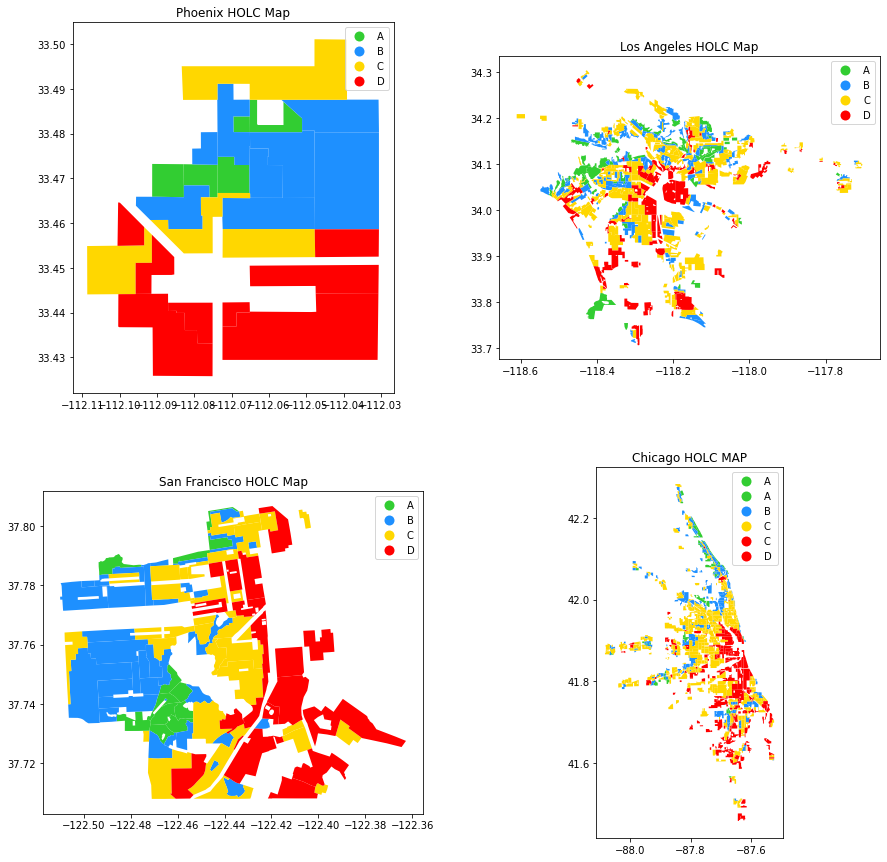

In [4]:
az_gdf = maps[maps['city'] == 'Phoenix']
la_gdf = maps[maps['city'] == 'Los Angeles']
sf_gdf = maps[maps['city'] == 'San Francisco']
ch_gdf = maps[maps['city'] == 'Chicago']

redline_colors = ListedColormap(["limegreen","dodgerblue","gold","red"])

fig, axs = plt.subplots(2, 2, figsize=(15, 15))

# Plot 1
az_gdf.plot(column='grade', categorical=True, legend=True, cmap=redline_colors, ax=axs[0, 0])
axs[0, 0].set_title('Phoenix HOLC Map')

# Plot 2
la_gdf.plot(column='grade', categorical=True, legend=True, cmap=redline_colors, ax=axs[0, 1])
axs[0, 1].set_title('Los Angeles HOLC Map')

# Plot 3
sf_gdf.plot(column='grade', categorical=True, legend=True, cmap=redline_colors, ax=axs[1, 0])
axs[1, 0].set_title('San Francisco HOLC Map')

# Plot 4
ch_gdf.plot(column='grade', categorical=True, legend=True, cmap=redline_colors, ax=axs[1, 1])
axs[1, 1].set_title('Chicago HOLC MAP')

plt.show()

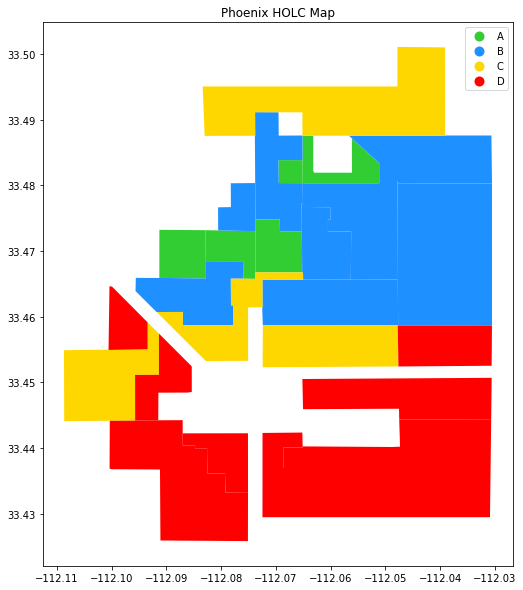

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot for Arizona
az_gdf.plot(column='grade', categorical=True, legend=True, cmap=redline_colors, ax=ax)
ax.set_title('Phoenix HOLC Map')

plt.show()

# Metro Grades
The `metro-grades.csv` provides 2020 population total estimates by race/ethnicity for combined zones of each HOLC grade within metropolitan areas. The dataset was complied by FiveThirtyEight, who were seeking to analyze the lasting impact of redlining. More information regarding the data can be found here: https://github.com/fivethirtyeight/data/tree/master/redlining.

In [6]:
metro_grades = pd.read_csv('metro-grades.csv')
metro_grades

,metro_area,holc_grade,white_pop,black_pop,hisp_pop,asian_pop,other_pop,total_pop,pct_white,pct_black,pct_hisp,pct_asian,pct_other,lq_white,lq_black,lq_hisp,lq_asian,lq_other,surr_area_white_pop,surr_area_black_pop,surr_area_hisp_pop,surr_area_asian_pop,surr_area_other_pop,surr_area_pct_white,surr_area_pct_black,surr_area_pct_hisp,surr_area_pct_asian,surr_area_pct_other
0,"Akron, OH",A,24702,8624,956,688,1993,36963,66.83,23.33,2.59,1.86,5.39,0.94,1.41,1.00,0.46,0.97,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
1,"Akron, OH",B,41531,16499,2208,3367,4211,67816,61.24,24.33,3.26,4.96,6.21,0.86,1.47,1.26,1.23,1.11,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
2,"Akron, OH",C,73105,22847,3149,6291,7302,112694,64.87,20.27,2.79,5.58,6.48,0.91,1.23,1.08,1.38,1.16,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
3,"Akron, OH",D,6179,6921,567,455,1022,15144,40.80,45.70,3.75,3.00,6.75,0.57,2.76,1.45,0.74,1.21,304399,70692,11037,17295,23839,71.24,16.55,2.58,4.05,5.58
4,"Albany-Schenectady-Troy, NY",A,16989,1818,1317,1998,1182,23303,72.91,7.80,5.65,8.57,5.07,1.09,0.66,0.77,1.21,0.72,387016,68371,42699,41112,40596,66.75,11.79,7.36,7.09,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,"York-Hanover, PA",D,3449,2788,4794,96,634,11761,29.32,23.71,40.76,0.82,5.39,0.40,2.91,3.61,0.38,1.18,252133,27842,38586,7290,15634,73.83,8.15,11.30,2.13,4.58
547,"Youngstown-Warren-Boardman, OH-PA",A,4566,1962,426,68,361,7383,61.84,26.57,5.77,0.92,4.89,0.83,1.81,1.22,1.17,0.99,279003,54773,17687,2931,18410,74.84,14.69,4.74,0.79,4.94
548,"Youngstown-Warren-Boardman, OH-PA",B,16173,6839,1475,175,1611,26273,61.56,26.03,5.61,0.67,6.13,0.82,1.77,1.18,0.85,1.24,279003,54773,17687,2931,18410,74.84,14.69,4.74,0.79,4.94
549,"Youngstown-Warren-Boardman, OH-PA",C,32498,14924,4263,252,3631,55569,58.48,26.86,7.67,0.45,6.53,0.78,1.83,1.62,0.58,1.32,279003,54773,17687,2931,18410,74.84,14.69,4.74,0.79,4.94


When looking at current population estimates within formely blocked HOLC areas, we begin to see the impact that redlining has had on the population of the United States. Zones that were once considered hazardous to lending institutions and were predominately black and Hispanic, are still black and Hispanic. On average, former HOLC D or hazardous areas are still comrpised of primarly black and Hispanic residents, with black and Hispanic residents making up for over 56% of the population of former HOLC D areas. Contrastly, areas that were former HOLC A areas are still primarly comprised of white residents. This sentiment is true also true in Phoenix, with 67% of former HOLC A areas being inhabited by white residents and 76% of former HOLC D areas being inhabited by black and Hispanic residents.

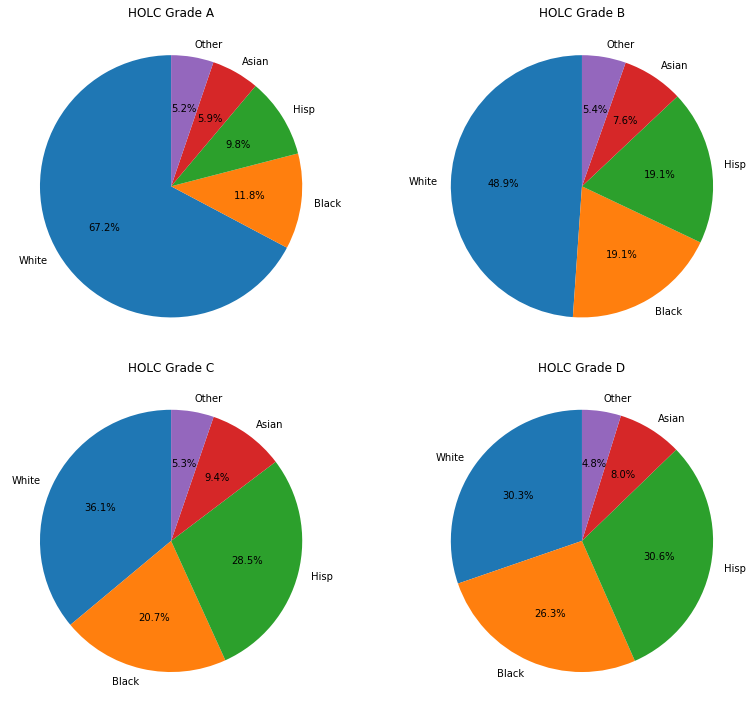

In [7]:
# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate through unique holc_grades and create pie charts
for i, holc_grade in enumerate(metro_grades['holc_grade'].unique()):
    # Filter data for the current holc_grade
    subset = metro_grades[metro_grades['holc_grade'] == holc_grade]

    # Calculate total population for the current holc_grade
    total_pop = subset['total_pop'].sum()

    # Extract population data for pie chart
    populations = subset[['white_pop', 'black_pop', 'hisp_pop', 'asian_pop', 'other_pop']].sum()

    # Calculate percentages
    percentages = populations / total_pop * 100

    # Plot pie chart in the corresponding subplot
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.pie(percentages, labels=[label[:-4].capitalize() for label in populations.index], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'HOLC Grade {holc_grade}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

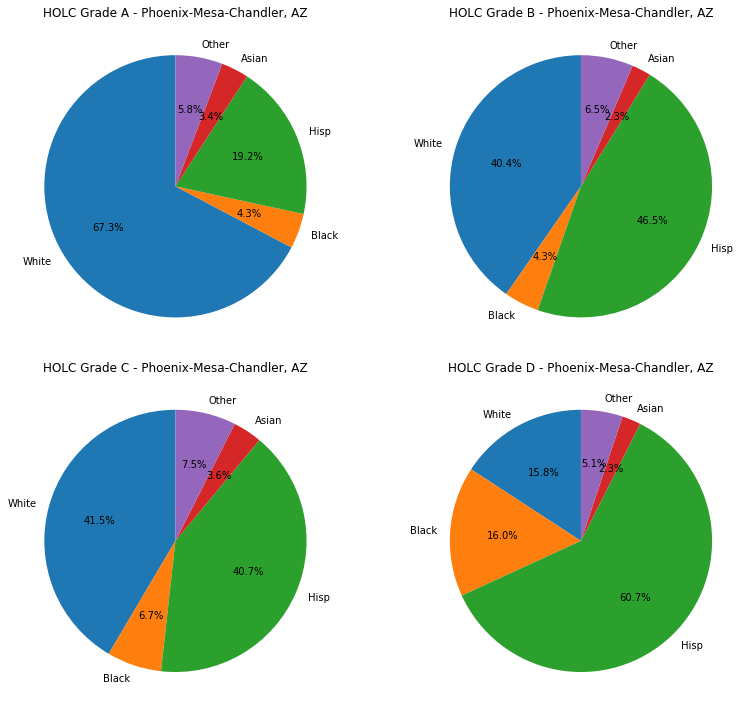

In [8]:
phoenix_rows = metro_grades[metro_grades['metro_area'] == 'Phoenix-Mesa-Chandler, AZ']

# Create a 2x2 subplot
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Iterate through unique holc_grades and create pie charts for the filtered data
for i, holc_grade in enumerate(phoenix_rows['holc_grade'].unique()):
    # Filter data for the current holc_grade within the filtered rows
    subset = phoenix_rows[phoenix_rows['holc_grade'] == holc_grade]

    # Calculate total population for the current holc_grade
    total_pop = subset['total_pop'].sum()

    # Extract population data for pie chart
    populations = subset[['white_pop', 'black_pop', 'hisp_pop', 'asian_pop', 'other_pop']].sum()

    # Calculate percentages
    percentages = populations / total_pop * 100

    # Plot pie chart in the corresponding subplot
    row, col = divmod(i, 2)
    ax = axes[row, col]
    ax.pie(percentages, labels=[label[:-4].capitalize() for label in populations.index], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'HOLC Grade {holc_grade} - Phoenix-Mesa-Chandler, AZ')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

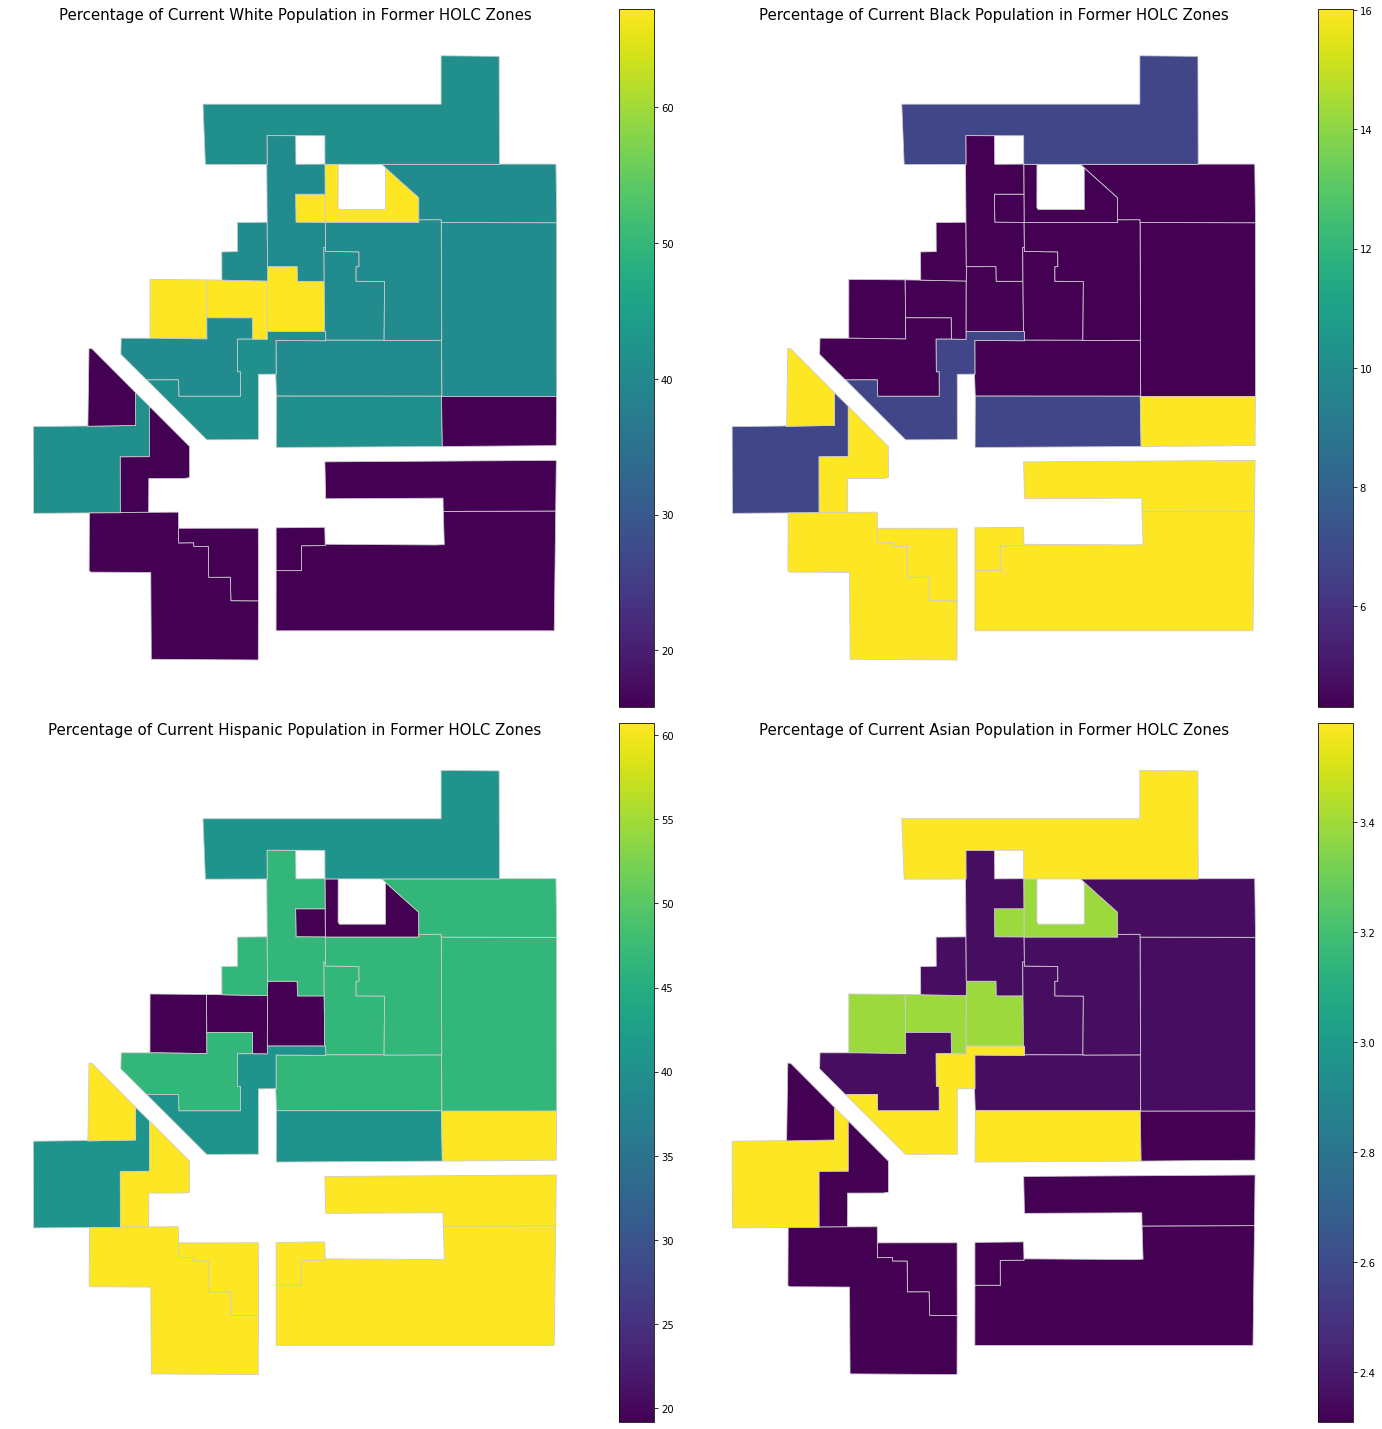

In [9]:
az_gdf['holc_grade'] = az_gdf['grade']
merged_data = pd.merge(az_gdf, phoenix_rows, on='holc_grade', how='inner')
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Plotting the first subplot (Percentage of White Population)
merged_data.plot(column='pct_white', cmap='viridis', linewidth=0.8, ax=axes[0, 0], edgecolor='0.8', legend=True)
axes[0, 0].set_title('Percentage of Current White Population in Former HOLC Zones', fontdict={'fontsize': '15', 'fontweight': '3'})
axes[0, 0].set_axis_off()

# Plotting the second subplot (Percentage of Black Population)
merged_data.plot(column='pct_black', cmap='viridis', linewidth=0.8, ax=axes[0, 1], edgecolor='0.8', legend=True)
axes[0, 1].set_title('Percentage of Current Black Population in Former HOLC Zones', fontdict={'fontsize': '15', 'fontweight': '3'})
axes[0, 1].set_axis_off()

# Plotting the third subplot (Percentage of Asian Population)
merged_data.plot(column='pct_hisp', cmap='viridis', linewidth=0.8, ax=axes[1, 0], edgecolor='0.8', legend=True)
axes[1, 0].set_title('Percentage of Current Hispanic Population in Former HOLC Zones', fontdict={'fontsize': '15', 'fontweight': '3'})
axes[1, 0].set_axis_off()

# Plotting the fourth subplot (Percentage of Other Population)
merged_data.plot(column='pct_asian', cmap='viridis', linewidth=0.8, ax=axes[1, 1], edgecolor='0.8', legend=True)
axes[1, 1].set_title('Percentage of Current Asian Population in Former HOLC Zones', fontdict={'fontsize': '15', 'fontweight': '3'})
axes[1, 1].set_axis_off()

# Adjust layout
plt.tight_layout()

# Show the combined plot
plt.show()

# Combining HOLC Maps with District Geodata from the National Center for Education Statistics
The National Center of Education Statistics provides the geodata for every school on a school and district level. When combining the district geodata and geocodes with HOLC Maps, we can see which districts exist in former HOLC areas. The district geodata was acquired from the National Center of Education Statistics, which used the U.S. Census Tiger/Line to get geometries for each district, and can be accessed here: https://nces.ed.gov/programs/edge/geographic/schoollocations

In [10]:
# read in the data
df = pd.read_excel('EDGE_GEOCODE_PUBLICLEA_2223.xlsx')
geometry = [Point(lon, lat) for lon, lat in zip(df['LON'], df['LAT'])]
schools_gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:5070")

# get the geocodes for districts in Maricopa County in Phoenix
az_schools_gdf = schools_gdf[(schools_gdf['NMCNTY'] == 'Maricopa County') & (schools_gdf['CITY'] == 'PHOENIX')]
az_schools_gdf

,LEAID,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LAT,LON,CBSA,NMCBSA,CBSATYPE,CSA,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,LOCALE,PCT_CITY11,PCT_CITY12,PCT_CITY13,PCT_SUB21,PCT_SUB22,PCT_SUB23,PCT_TOWN31,PCT_TOWN32,PCT_TOWN33,PCT_RURAL41,PCT_RURAL42,PCT_RURAL43,geometry
224,400031,Ridgeline Academy Inc. (4301),4,33625 N NORTH VALLEY PKWY,PHOENIX,AZ,85085,4,4013,Maricopa County,33.790133,-112.120925,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,408,04001,04001,2022-2023,11,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-112.121 33.790)
226,400034,Reid Traditional Schools' Valley Academy Inc. ...,4,14841 N BLACK CANYON HWY,PHOENIX,AZ,85023,4,4013,Maricopa County,33.620700,-112.115121,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,406,04020,04020,2022-2023,11,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-112.115 33.621)
227,400037,Twenty First Century Charter School Inc. Benne...,4,2930 W BETHANY HOME RD,PHOENIX,AZ,85017,4,4013,Maricopa County,33.524779,-112.122939,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,407,04030,04030,2022-2023,11,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-112.123 33.525)
229,400041,Maricopa County Community College District dba...,4,108 N 40TH ST,PHOENIX,AZ,85034,4,4013,Maricopa County,33.449330,-111.997097,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,407,04027,04027,2022-2023,11,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-111.997 33.449)
232,400052,Espiritu Community Development Corp. (4335),4,4848 S 2ND ST,PHOENIX,AZ,85040,4,4013,Maricopa County,33.401921,-112.071424,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,407,04027,04027,2022-2023,11,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-112.071 33.402)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,407750,Deer Valley Unified District (4246),4,20402 N 15TH AVE,PHOENIX,AZ,85027,4,4013,Maricopa County,33.671220,-112.092273,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,406,04015,04015,2022-2023,21,45.18,0.0,0.0,51.63,0.0,0.0,0.0,0.0,0.0,3.2,0.0,0.0,POINT (-112.092 33.671)
910,409390,Wilson Elementary District (4261),4,3025 E FILLMORE ST,PHOENIX,AZ,85008,4,4013,Maricopa County,33.454591,-112.016200,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,407,04027,04027,2022-2023,11,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-112.016 33.455)
920,409734,Arizona Department of Juvenile Corrections (8326),4,1624 W ADAMS ST,PHOENIX,AZ,85007,4,4013,Maricopa County,33.449033,-112.092707,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,407,04027,04027,2022-2023,11,-2.00,-2.0,-2.0,-2.00,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,POINT (-112.093 33.449)
923,409737,Archway Classical Academy Trivium West (1001937),4,4801 E WASHINGTON ST STE 250,PHOENIX,AZ,85034,4,4013,Maricopa County,33.446648,-111.977644,38060,"Phoenix-Mesa-Chandler, AZ",1,429,"Phoenix-Mesa, AZ",N,N,407,04027,04027,2022-2023,11,100.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,POINT (-111.978 33.447)


Below are the districts that operate in former HOLC areas. There are a total of 20 districts within former HOLC areas.

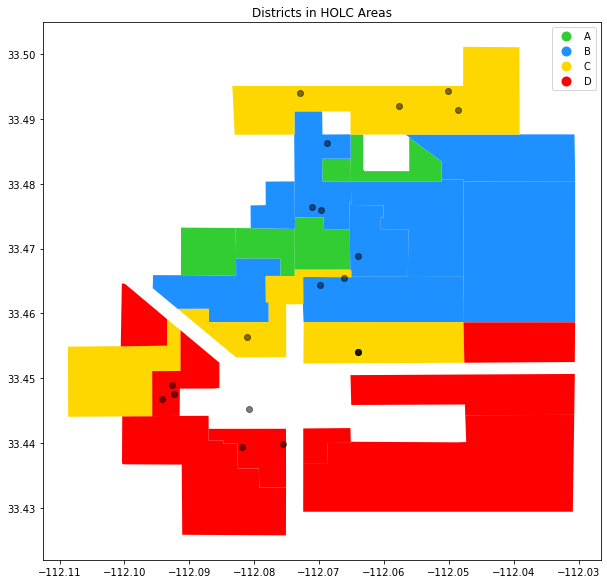

In [11]:
districts_in_zones = sjoin(az_schools_gdf, az_gdf, how="inner", op='within')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot for Arizona
az_gdf.plot(column='grade', categorical=True, legend=True, cmap=redline_colors, ax=ax)

# Plot the districts inside az_gdf in a different color
districts_in_zones.plot(ax=ax, color='black', alpha=0.5)

# Show the plot
plt.title('Districts in HOLC Areas')
plt.show()

In [12]:
pd.set_option('display.max_colwidth', None)
districts_in_zones['NAME']

236                           Arizona School For The Arts (4345)
278                                  Genesis Program Inc. (4332)
237                    Arizona Center for Youth Resources (4346)
242                  Khalsa Montessori Elementary Schools (4360)
267             Arizona Agribusiness & Equine Center Inc. (4331)
441    Portable Practical Educational Preparation Inc. ( (87405)
265                                   Friendly House Inc. (4303)
612                       Vista College Preparatory Inc. (91948)
270                 Phoenix Advantage Charter School Inc. (4338)
400                               Midtown Primary School (79994)
649                     Self Development Academy-Phoenix (92381)
786              Maricopa County Regional School District (4234)
275                     Arizona Department of Corrections (8336)
569                                 Arizona Supreme Court (9576)
920            Arizona Department of Juvenile Corrections (8326)
457                      

Here are the districts by HOLC grade.

In [13]:
# Group schools by holc_grade
schools_by_holc_grade = districts_in_zones.groupby('holc_grade')

# Print schools in each holc_grade
for holc_grade, schools_df in schools_by_holc_grade:
    print(f"\nHOLC Grade: {holc_grade}")
    print(schools_df[['NAME', 'grade']])


HOLC Grade: B
                                                          NAME grade
236                         Arizona School For The Arts (4345)     B
278                                Genesis Program Inc. (4332)     B
242                Khalsa Montessori Elementary Schools (4360)     B
267           Arizona Agribusiness & Equine Center Inc. (4331)     B
441  Portable Practical Educational Preparation Inc. ( (87405)     B
842                         Phoenix Elementary District (4256)     B

HOLC Grade: C
                                                NAME grade
237        Arizona Center for Youth Resources (4346)     C
270     Phoenix Advantage Charter School Inc. (4338)     C
400                   Midtown Primary School (79994)     C
649         Self Development Academy-Phoenix (92381)     C
786  Maricopa County Regional School District (4234)     C
507                  ASU Preparatory Academy (89949)     C
588                  ASU Preparatory Academy (91303)     C
614            

In [14]:
all_districts_with_grade = sjoin(schools_gdf, maps, how="inner", op='within')

In [15]:
districts_by_holc_grade = all_districts_with_grade.groupby('grade')

for grade, schools_gdf in districts_by_holc_grade:
    print(f"\nHOLC Grade: {grade}")
    print(schools_gdf[['NAME', 'grade']])



HOLC Grade: 
                                       NAME grade
934           DAWSON EDUCATION SERVICE COOP      
1038            ARKADELPHIA SCHOOL DISTRICT      
944              BATESVILLE SCHOOL DISTRICT      
1094              EL DORADO SCHOOL DISTRICT      
1098           CAMDEN FAIRVIEW SCHOOL DIST.      
...                                     ...   ...
18436   CROSSROADS ALTERNATIVE/BRISTOL CITY      
18471           Bristol City Public Schools      
18486  Colonial Heights City Public Schools      
18491          Danville City Public Schools      
18514      Harrisonburg City Public Schools      

[62 rows x 2 columns]

HOLC Grade: A
                                                      NAME grade
331                Metropolitan Arts Institute Inc. (5181)     A
663             Pathways In Education-Arizona Inc. (92983)     A
1016                         SCHOLARMADE ACHIEVEMENT PLACE     A
1989                     Aveson School of Leaders District     A
2169                 CA

# Districts in HOLC Areas with Finacial Data
Now that we know which schools are in former HOLC areas, we can begin to provide characteristics for each school to see how redlining has affected education. The `sdf21_1a.txt` file, sourced from the National Center for Education Statistics (NCES), contains fiscal information for each school district in the United States. The NCES acquired this data through the Department of Education's F-33 Finance Survey, which asks each district to describe how the school recieves and spends money. More information regarding the data can be found here: https://nces.ed.gov/programs/edge/geographic/schoollocations. More information about the F-33 survey can be found here: https://nces.ed.gov/ccd/pdf/21F33.pdf.

In [16]:
file_path = 'sdf21_1a.txt'

# Specify the encoding as 'latin1'
df = pd.read_csv(file_path, delimiter='\t', encoding='latin1')

# create subsets of the data containing every school per HOLC grade.
b_districts = [
    'Arizona School For The Arts (4345)',
    'Genesis Program Inc. (4332)',
    'Khalsa Montessori Elementary Schools (4360)',
    'Arizona Agribusiness & Equine Center Inc. (4331)',
    'Portable Practical Educational Preparation Inc. ( (87405)',
    'Phoenix Elementary District (4256)'
]

az_b_districts = df[df['NAME'].isin(b_districts)]

c_districts = [
    'Arizona Center for Youth Resources (4346)',
    'Phoenix Advantage Charter School Inc. (4338)',
    'Midtown Primary School (79994)',
    'Self Development Academy-Phoenix (92381)',
    'Maricopa County Regional School District (4234)',
    'ASU Preparatory Academy (89949)'
    'ASU Preparatory Academy (91303)'
    'ASU Preparatory Academy (92325)'
]

az_c_districts = df[df['NAME'].isin(c_districts)]

d_districts = [
    'Friendly House Inc. (4303)',
    'Vista College Preparatory Inc. (91948)'
]
az_d_districts = df[df['NAME'].isin(d_districts)]
az_d_districts

,LEAID,CENSUSID,FIPST,CONUM,CSA,CBSA,NAME,STNAME,STABBR,SCHLEV,AGCHRT,YEAR,CCDNF,CENFILE,GSLO,GSHI,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,C15,C19,C22,C23,C26,C27,B11,C20,C25,C36,B10,B12,B14,B13,TSTREV,C01,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C35,C38,C39,TLOCREV,T02,T06,T09,T15,T40,T99,D11,D23,A07,A08,A09,A11,A13,A15,A20,A40,U11,U22,U30,U50,U97,C24,TOTALEXP,TCURELSC,TCURINST,E13,V91,V92,TCURSSVC,E17,E07,E08,E09,V40,V45,V90,V85,TCUROTH,E11,V60,V65,TNONELSE,V70,V75,V80,TCAPOUT,F12,G15,K09,K10,K11,L12,M12,Q11,I86,Z32,Z33,Z35,Z36,Z37,Z38,V11,V13,V15,V17,V21,V23,V37,V29,Z34,V10,V12,V14,V16,V18,V22,V24,V38,V30,V32,V93,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61,V95,V02,K14,CE1,CE2,CE3,SE1,SE2,SE3,SE4,SE5,AR1,AR1A,AR1B,AR2,AR2A,AR3,AR6,AR6A,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,WEIGHT,FL_V33,FL_MEMBERSCH,FL_C14,FL_C15,FL_C19,FL_C22,FL_C23,FL_C26,FL_C27,FL_B11,FL_C20,FL_C25,FL_C36,FL_B10,FL_B12,FL_B14,FL_B13,FL_C01,FL_C04,FL_C05,FL_C06,FL_C07,FL_C08,FL_C09,FL_C10,FL_C11,FL_C12,FL_C13,FL_C35,FL_C38,FL_C39,FL_T02,FL_T06,FL_T09,FL_T15,FL_T40,FL_T99,FL_D11,FL_D23,FL_A07,FL_A08,FL_A09,FL_A11,FL_A13,FL_A15,FL_A20,FL_A40,FL_U11,FL_U22,FL_U30,FL_U50,FL_U97,FL_C24,FL_E13,FL_V91,FL_V92,FL_E17,FL_E07,FL_E08,FL_E09,FL_V40,FL_V45,FL_V90,FL_V85,FL_E11,FL_V60,FL_V65,FL_V70,FL_V75,FL_V80,FL_F12,FL_G15,FL_K09,FL_K10,FL_K11,FL_L12,FL_M12,FL_Q11,FL_I86,FL_Z32,FL_Z33,FL_Z35,FL_Z36,FL_Z37,FL_Z38,FL_V11,FL_V13,FL_V15,FL_V17,FL_V21,FL_V23,FL_V37,FL_V29,FL_Z34,FL_V10,FL_V12,FL_V14,FL_V16,FL_V18,FL_V22,FL_V24,FL_V38,FL_V30,FL_V32,FL_V93,FL_19H,FL_21F,FL_31F,FL_41F,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2,FL_CE3,FL_SE1,FL_SE2,FL_SE3,FL_SE4,FL_SE5,FL_AR1,FL_AR1A,FL_AR1B,FL_AR2,FL_AR2A,FL_AR3,FL_AR6,FL_AR6A,FL_AE1,FL_AE2,FL_AE3,FL_AE4,FL_AE5,FL_AE6,FL_AE7,FL_AE8
295,400102,N,4,4013,429,38060,Friendly House Inc. (4303),Arizona,AZ,01,1,21,1,0,KG,08,337,337,4588000,1653000,188000,93000,0,21000,10000,174000,0,12000,0,154000,1001000,0,0,0,0,2783000,2769000,14000,0,0,0,0,0,0,0,0,0,0,0,0,152000,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,7000,0,0,0,0,0,0,77000,68000,0,4135000,4105000,2306000,2306000,0,0,1245000,189000,260000,166000,115000,327000,63000,125000,0,554000,554000,0,0,14000,14000,0,0,12000,11000,0,0,1000,0,0,0,0,4000,2051000,1325000,916000,103000,0,0,99000,147000,53000,90000,75000,28000,0,234000,521000,329000,12000,19000,22000,22000,16000,13000,0,88000,0,0,0,0,0,0,0,0,0,0,0,105000,118000,0,2843000,1262000,0,0,0,0,0,0,149000,179000,0,75000,0,0,160000,0,666000,472000,192000,0,110000,0,75000,3000,1,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,M,R,R,M,M,N,N,N,N,N,N,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,R,R,R,R,R,R,R,R,R,M,R,R,M,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,I,I,M,M,M,M,M,M,R,R,R,R,M,M,R,M,R,R,R,R,R,R,R,R
656,400887,N,4,4013,429,38060,Vista College Preparatory Inc. (91948),Arizona,AZ,01,1,21,1,0,KG,08,1002,1002,10053000,2184000,311000,102000,0,54000,0,0,0,0,0,325000,1392000,0,0,0,0,7136000,7037000,40000,0,59000,0,0,0,0,0,0,0,0,0,0,733000,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,18000,0,0,0,0,0,0,714000,1000,0,12601000,8275000,3740000,3740000,0,0,4261000,610000,258000,0,1081000,477000,26000,1809000,0,274000,274000,0,0,0,0,0,0,3496000,0,1742000,0,1754000,0,0,0,0,830000,5045000,2646000,304000,93000,0,0,430000,136000,0,891000,0,0,907000,35000,789000,443000,57000,17000,0,131000,0,0,135000,4000,0,0,0,0,0,0,0,0,277000,927000,2936000,103000,438000,0,6736000,1538000,0,0,0,0,0,0,239000,0,0,0,0,0,169000,0,408000,350000,59000,0,0,0,25000,0,1,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,M,R,R,M,M,N,N,N,N,N,N,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,M,R,R,R,R,R,R,R,R,R,R,M,R,R,M,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,R,I,I,M,M,M,M,M,M,R,R,R,R,M,M,R,M,R,R,R,R,R,R,R,R


For each district, we looked at Total Revenue (`TOTALREV`), Total Local Revenue (`TLOCREV`), and Total Expenditures (`TOTALEXP`). We found that when compared to HOLC B areas, HOLC D areas had lower revenues, local revenues, and expenditures on average. While HOLC D areas had higher revenues and expenditures than HOLC C areas, HOLC D areas had the lowest local revenues of all HOLC areas and were generating less profit than all areas. While redlining does not fully explain the economic inequality that exist within schools, the variation in revenue, local revenue, and expenditures show that districts in HOLC D areas tend to be at an economic disadvantage when compared to districts in HOLC B areas.

Average TOTALREV for HOLC B: 29344666.666666668
Average TOTALREV for HOLC C: 3251000.0
Average TOTALREV for HOLC D: 7320500.0


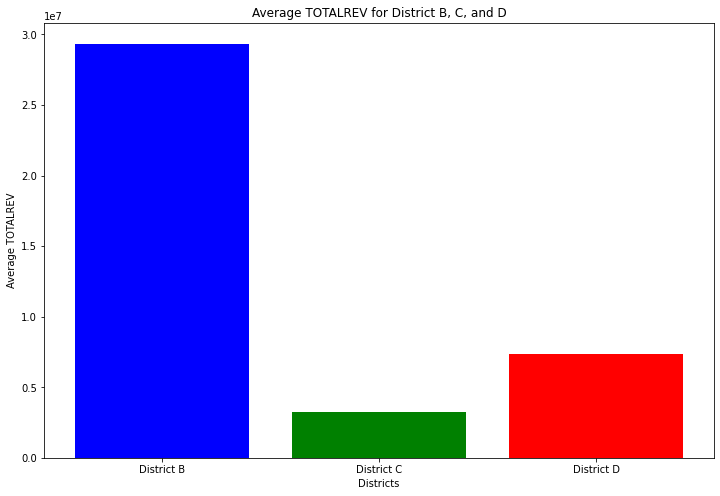

In [17]:
b_avg_rev = az_b_districts['TOTALREV'].mean()
print(f"Average TOTALREV for HOLC B: {b_avg_rev}")

c_avg_rev = az_c_districts['TOTALREV'].mean()
print(f"Average TOTALREV for HOLC C: {c_avg_rev}")

d_avg_rev = az_d_districts['TOTALREV'].mean()
print(f"Average TOTALREV for HOLC D: {d_avg_rev}")

plt.figure(figsize=(12, 8))

districts = ['District B', 'District C', 'District D']
average_revenues = [b_avg_rev, c_avg_rev, d_avg_rev]

plt.bar(districts, average_revenues, color=['blue', 'green', 'red'])
plt.xlabel('Districts')
plt.ylabel('Average TOTALREV')
plt.title('Average TOTALREV for District B, C, and D')
plt.show()

Average TLOCREV for HOLC B: 8810500.0
Average TLOCREV for HOLC C: 701250.0
Average TLOCREV for HOLC D: 442500.0


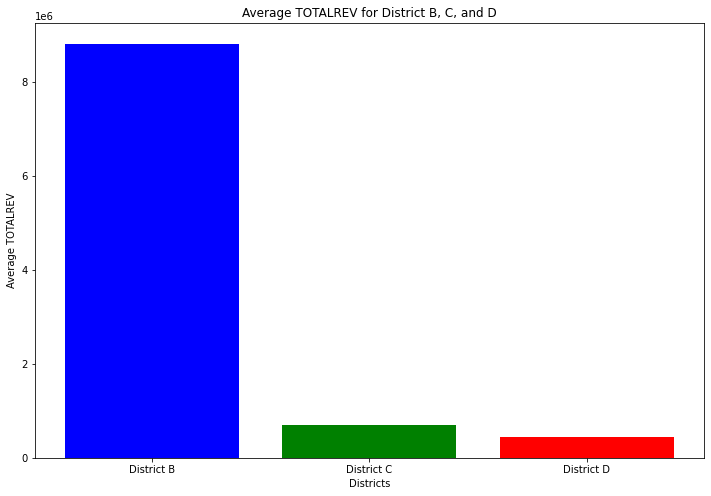

In [18]:
b_avg_locrev = az_b_districts['TLOCREV'].mean()
print(f"Average TLOCREV for HOLC B: {b_avg_locrev}")

c_avg_locrev = az_c_districts['TLOCREV'].mean()
print(f"Average TLOCREV for HOLC C: {c_avg_locrev}")

d_avg_locrev = az_d_districts['TLOCREV'].mean()
print(f"Average TLOCREV for HOLC D: {d_avg_locrev}")

plt.figure(figsize=(12, 8))

districts = ['District B', 'District C', 'District D']
loc_revenues = [b_avg_locrev, c_avg_locrev, d_avg_locrev]

plt.bar(districts, loc_revenues, color=['blue', 'green', 'red'])
plt.xlabel('Districts')
plt.ylabel('Average TOTALREV')
plt.title('Average TOTALREV for District B, C, and D')
plt.show()

Average Expenditures for HOLC B: 28176166.666666668
Average Expenditures for HOLC C:  3310750.0
Average Expenditures for HOLC D: 8368000.0


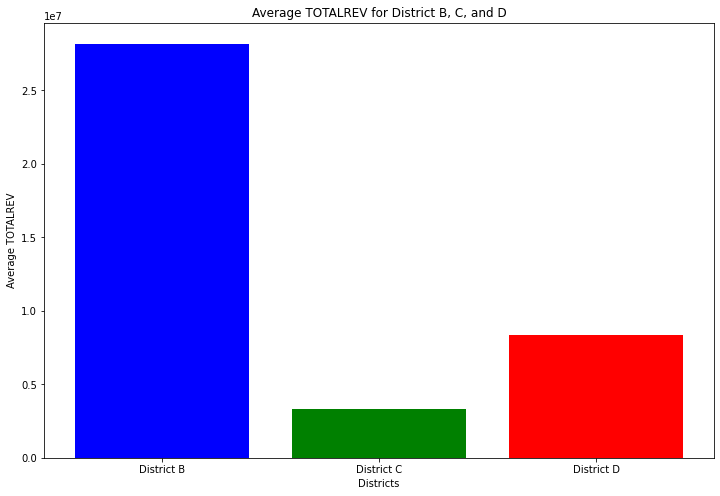

In [19]:
b_avg_exp = az_b_districts['TOTALEXP'].mean()
print(f"Average Expenditures for HOLC B: {b_avg_exp}")

c_avg_exp = az_c_districts['TOTALEXP'].mean()
print(f"Average Expenditures for HOLC C:  {c_avg_exp}")

d_avg_exp = az_d_districts['TOTALEXP'].mean()
print(f"Average Expenditures for HOLC D: {d_avg_exp}")

plt.figure(figsize=(12, 8))

districts = ['District B', 'District C', 'District D']
avg_exp = [b_avg_exp, c_avg_exp, d_avg_exp]

plt.bar(districts, avg_exp, color=['blue', 'green', 'red'])
plt.xlabel('Districts')
plt.ylabel('Average TOTALREV')
plt.title('Average TOTALREV for District B, C, and D')
plt.show()

In [20]:
distric_with_fin = pd.merge(all_districts_with_grade, df, on = 'NAME', how = 'inner')
distric_with_fin

,LEAID_x,NAME,OPSTFIPS,STREET,CITY,STATE,ZIP,STFIP,CNTY,NMCNTY,LAT,LON,CBSA_x,NMCBSA,CBSATYPE,CSA_x,NMCSA,NECTA,NMNECTA,CD,SLDL,SLDU,SCHOOLYEAR,LOCALE,PCT_CITY11,PCT_CITY12,PCT_CITY13,PCT_SUB21,PCT_SUB22,PCT_SUB23,PCT_TOWN31,PCT_TOWN32,PCT_TOWN33,PCT_RURAL41,PCT_RURAL42,PCT_RURAL43,geometry,index_right,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,LEAID_y,CENSUSID,FIPST,CONUM,CSA_y,CBSA_y,STNAME,STABBR,SCHLEV,AGCHRT,YEAR,CCDNF,CENFILE,GSLO,GSHI,V33,MEMBERSCH,TOTALREV,TFEDREV,C14,C15,C19,C22,C23,C26,C27,B11,C20,C25,C36,B10,B12,B14,B13,TSTREV,C01,C04,C05,C06,C07,C08,C09,C10,C11,C12,C13,C35,C38,C39,TLOCREV,T02,T06,T09,T15,T40,T99,D11,D23,A07,A08,A09,A11,A13,A15,A20,A40,U11,U22,U30,U50,U97,C24,TOTALEXP,TCURELSC,TCURINST,E13,V91,V92,TCURSSVC,E17,E07,E08,E09,V40,V45,V90,V85,TCUROTH,E11,V60,V65,TNONELSE,V70,V75,V80,TCAPOUT,F12,G15,K09,K10,K11,L12,M12,Q11,I86,Z32,Z33,Z35,Z36,Z37,Z38,V11,V13,V15,V17,V21,V23,V37,V29,Z34,V10,V12,V14,V16,V18,V22,V24,V38,V30,V32,V93,_19H,_21F,_31F,_41F,_61V,_66V,W01,W31,W61,V95,V02,K14,CE1,CE2,CE3,SE1,SE2,SE3,SE4,SE5,AR1,AR1A,AR1B,AR2,AR2A,AR3,AR6,AR6A,AE1,AE2,AE3,AE4,AE5,AE6,AE7,AE8,WEIGHT,FL_V33,FL_MEMBERSCH,FL_C14,FL_C15,FL_C19,FL_C22,FL_C23,FL_C26,FL_C27,FL_B11,FL_C20,FL_C25,FL_C36,FL_B10,FL_B12,FL_B14,FL_B13,FL_C01,FL_C04,FL_C05,FL_C06,FL_C07,FL_C08,FL_C09,FL_C10,FL_C11,FL_C12,FL_C13,FL_C35,FL_C38,FL_C39,FL_T02,FL_T06,FL_T09,FL_T15,FL_T40,FL_T99,FL_D11,FL_D23,FL_A07,FL_A08,FL_A09,FL_A11,FL_A13,FL_A15,FL_A20,FL_A40,FL_U11,FL_U22,FL_U30,FL_U50,FL_U97,FL_C24,FL_E13,FL_V91,FL_V92,FL_E17,FL_E07,FL_E08,FL_E09,FL_V40,FL_V45,FL_V90,FL_V85,FL_E11,FL_V60,FL_V65,FL_V70,FL_V75,FL_V80,FL_F12,FL_G15,FL_K09,FL_K10,FL_K11,FL_L12,FL_M12,FL_Q11,FL_I86,FL_Z32,FL_Z33,FL_Z35,FL_Z36,FL_Z37,FL_Z38,FL_V11,FL_V13,FL_V15,FL_V17,FL_V21,FL_V23,FL_V37,FL_V29,FL_Z34,FL_V10,FL_V12,FL_V14,FL_V16,FL_V18,FL_V22,FL_V24,FL_V38,FL_V30,FL_V32,FL_V93,FL_19H,FL_21F,FL_31F,FL_41F,FL_61V,FL_66V,FL_W01,FL_W31,FL_W61,FL_V95,FL_V02,FL_K14,FL_CE1,FL_CE2,FL_CE3,FL_SE1,FL_SE2,FL_SE3,FL_SE4,FL_SE5,FL_AR1,FL_AR1A,FL_AR1B,FL_AR2,FL_AR2A,FL_AR3,FL_AR6,FL_AR6A,FL_AE1,FL_AE2,FL_AE3,FL_AE4,FL_AE5,FL_AE6,FL_AE7,FL_AE8
0,100018,Alabama School of Fine Arts,1,1800 Rev Abraham Woods Jr Blvd,Birmingham,AL,35203,1,1073,Jefferson County,33.520933,-86.812936,13820,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,107,01054,01018,2022-2023,12,-2.0,-2.00,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.00,-2.0,-2.0,POINT (-86.813 33.521),57,217,Birmingham,AL,True,Hazardous,D,D7,True,False,False,#d9838d,100018,N,1,1073,142,13820,Alabama,AL,N,N,21,1,0,07,12,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,1,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
1,100204,i3 Academy,1,1 55th Place South,Birmingham,AL,35212,1,1073,Jefferson County,33.537508,-86.763339,13820,"Birmingham-Hoover, AL",1,142,"Birmingham-Hoover-Talladega, AL",N,N,107,01054,01018,2022-2023,12,0.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,POINT (-86.763 33.538),54,183,Birmingham,AL,True,Hazardous,D,D4,True,False,False,#d9838d,100204,N,1,1073,142,13820,Alabama,AL,01,1,21,1,0,KG,12,417,417,8976000,2709000,341000,99000,13000,39000,0,0,0,0,1676000,541000,0,0,0,0,0,3977000,3240000,64000,0,102000,0,0,0,0,130000,140000,301000,0,0,0,2290000,-2,-2,-2,-2,-2,-2,0,0,17000,0,0,0,0,0,0,0,0,0,0,2239000,34000,0,9031000,8799000,46210

In [21]:
grade_a_all = distric_with_fin[distric_with_fin['grade'] == 'A']
grade_b_all = distric_with_fin[distric_with_fin['grade'] == 'B']
grade_c_all = distric_with_fin[distric_with_fin['grade'] == 'C']
grade_d_all = distric_with_fin[distric_with_fin['grade'] == 'D']

In [22]:
len(grade_a_all)

52

In [23]:
len(grade_b_all)

255

In [24]:
len(grade_c_all)

713

In [25]:
len(grade_d_all)

594

Average Expenditures for HOLC A: 65217288.461538464
Average Expenditures for HOLC B: 59000666.55686274
Average Expenditures for HOLC C: 55647182.22720898
Average Expenditures for HOLC D: 35817259.15993266


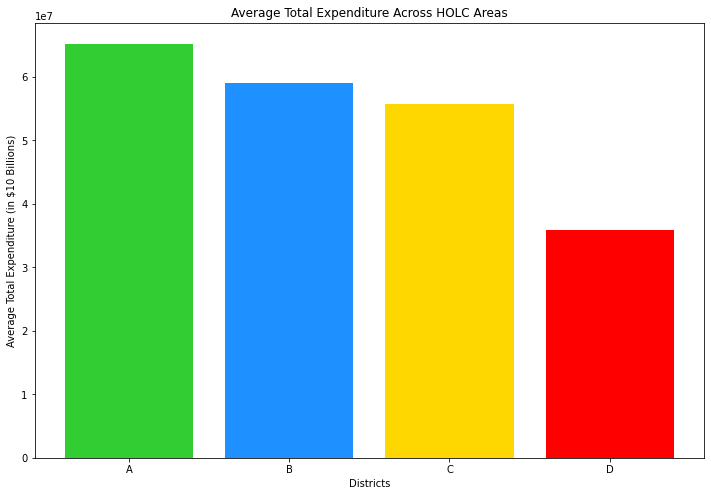

In [26]:
a_avg_exp = grade_a_all['TOTALEXP'].mean()
print(f"Average Expenditures for HOLC A: {a_avg_exp}")

b_avg_exp = grade_b_all['TOTALEXP'].mean()
print(f"Average Expenditures for HOLC B: {b_avg_exp}")

c_avg_exp = grade_c_all['TOTALEXP'].mean()
print(f"Average Expenditures for HOLC C: {c_avg_exp}")

d_avg_exp = grade_d_all['TOTALEXP'].mean()
print(f"Average Expenditures for HOLC D: {d_avg_exp}")

plt.figure(figsize=(12, 8))

districts = ['A', 'B', 'C', 'D']
avg_exp = [a_avg_exp, b_avg_exp, c_avg_exp, d_avg_exp]

plt.bar(districts, avg_exp, color=["limegreen", "dodgerblue", "gold", "red"])
plt.xlabel('Districts')
plt.ylabel('Average Total Expenditure (in $10 Billions)')
plt.title('Average Total Expenditure Across HOLC Areas')
plt.show()


Average Revenues for HOLC A: 64737826.92307692
Average Revenues for HOLC B: 58292176.360784315
Average Revenues for HOLC C: 58071098.07573633
Average Revenues for HOLC D: 33350203.604377106


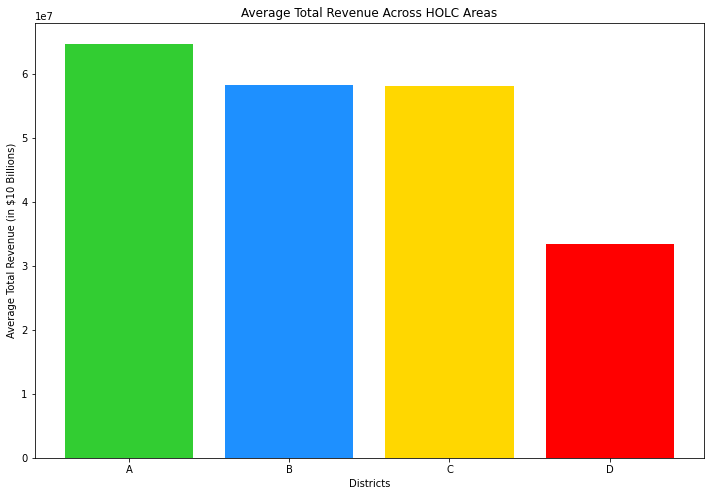

In [27]:
a_avg_rev = grade_a_all['TOTALREV'].mean()
print(f"Average Revenues for HOLC A: {a_avg_rev}")

b_avg_rev = grade_b_all['TOTALREV'].mean()
print(f"Average Revenues for HOLC B: {b_avg_rev}")

c_avg_rev = grade_c_all['TOTALREV'].mean()
print(f"Average Revenues for HOLC C: {c_avg_rev}")

d_avg_rev = grade_d_all['TOTALREV'].mean()
print(f"Average Revenues for HOLC D: {d_avg_rev}")

plt.figure(figsize=(12, 8))

districts = ['A', 'B', 'C', 'D']
avg_exp = [a_avg_rev, b_avg_rev, c_avg_rev, d_avg_rev]

plt.bar(districts, avg_exp, color=["limegreen", "dodgerblue", "gold", "red"])
plt.xlabel('Districts')
plt.ylabel('Average Total Revenue (in $10 Billions)')
plt.title('Average Total Revenue Across HOLC Areas')
plt.show()

Average Local Revenue for HOLC A: 33779596.15384615
Average Local Revenue for HOLC B: 28078019.498039216
Average Local Revenue for HOLC C: 23146291.62412342
Average Local Revenue for HOLC D: 13203388.789562289


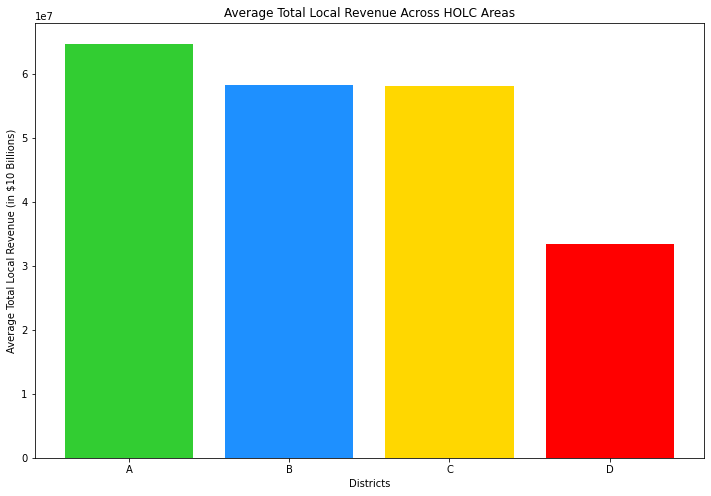

In [28]:
a_avg_locrev = grade_a_all['TLOCREV'].mean()
print(f"Average Local Revenue for HOLC A: {a_avg_locrev}")

b_avg_locrev = grade_b_all['TLOCREV'].mean()
print(f"Average Local Revenue for HOLC B: {b_avg_locrev}")

c_avg_locrev = grade_c_all['TLOCREV'].mean()
print(f"Average Local Revenue for HOLC C: {c_avg_locrev}")

d_avg_locrev = grade_d_all['TLOCREV'].mean()
print(f"Average Local Revenue for HOLC D: {d_avg_locrev}")

plt.figure(figsize=(12, 8))

districts = ['A', 'B', 'C', 'D']
avg_exp = [a_avg_rev, b_avg_rev, c_avg_rev, d_avg_rev]

plt.bar(districts, avg_exp, color=["limegreen", "dodgerblue", "gold", "red"])
plt.xlabel('Districts')
plt.ylabel('Average Total Local Revenue (in $10 Billions)')
plt.title('Average Total Local Revenue Across HOLC Areas')
plt.show()

# HOLC Districts and Health Relating to the Environment

In order to examine health issues that people in the HOLC neighbhorhoods face, we needed to look at the data based on census tracts. The dataset `HOLC_2010_census_tracts.csv`is from Diversity Data Kids, an organization that uses research and data to enhance racial and justice equity. This dataset includes neighborhood grades by the HOLC mapped to 2010 US Census Tracts.

For the purposes of this analysis, the census tract's HOLC grade will be assigned based on class1 - which indicates the HOLC grade (A, B, C, or D) that covers the largest proportion of the census tract's area. It is the primary indicator of the HOLC rating for a census tract.

In [29]:
holc_census_df = pd.read_csv("HOLC_2010_census_tracts.csv")

holc_census_df.head()

,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D
0,1073000100,D,Mainly D,D-C,"Mainly D, some C","Mainly D, some C",D-C-B,"Mainly D, some C, some B",7549575.5,73.293701,26.706303,0.0,4.261454,26.091936,42.940308
1,1073000300,D,Mainly D,D-C,"Mainly D, some C","Mainly D, some C",D-C,"Mainly D, some C",2093096.8,94.083206,5.916792,0.0,0.000000,0.586387,93.496819
2,1073000400,D,Mainly D,D-C,"Mainly D, some C","Mainly D, some C",D-C,"Mainly D, some C",8001587.5,46.586910,53.413090,0.0,0.000000,10.454468,36.132439
3,1073000500,D,Mainly D,D,Mainly D,Only D,D,Mainly D,4819156.5,65.387039,34.612961,0.0,0.000000,0.000000,65.387039
4,1073000700,D,Mainly D,D,Mainly D,Only D,D,Mainly D,3520562.8,41.288933,58.711067,0.0,0.000000,0.000000,41.288933


In [30]:
#filtering dataset to just arizona based on the 04 FIP code

holc_data = holc_census_df.copy()

first_two_digi = holc_data['geoid10'] // 100000000

az_census_data= holc_data[first_two_digi == 40]

In [31]:
az_census_data.head()

,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D
122,4013108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.10,42.731281,57.268719,0.000000,0.000000,42.731281,0.0
123,4013108601,C,Mainly C,C,Mainly C,Only C,C,Mainly C,817425.44,6.932558,93.067444,0.000000,0.000000,6.932558,0.0
124,4013108602,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1770563.50,1.007899,98.992104,0.000000,0.000000,1.007899,0.0
125,4013110501,C,Mainly C,C-B,"Mainly C, some B","Mainly C or D, some B",C-B,"Mainly C, some B",1414637.10,50.267754,49.732246,0.000000,0.351521,49.916229,0.0
126,4013110502,B,Mainly B,B-C,"Mainly B, some C","Mainly B, some C or D",B-C-A,"Mainly B, some C, some A",1310116.00,87.902611,12.097391,12.384336,50.137741,25.380531,0.0


In [32]:
az_census_data['geoid10'] = az_census_data['geoid10'].astype(str)

#Remove first four digits to allow for easy merging in future
az_census_data['geoid10'] = az_census_data['geoid10'].str[4:]

az_census_data.head()

,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D
122,108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.10,42.731281,57.268719,0.000000,0.000000,42.731281,0.0
123,108601,C,Mainly C,C,Mainly C,Only C,C,Mainly C,817425.44,6.932558,93.067444,0.000000,0.000000,6.932558,0.0
124,108602,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1770563.50,1.007899,98.992104,0.000000,0.000000,1.007899,0.0
125,110501,C,Mainly C,C-B,"Mainly C, some B","Mainly C or D, some B",C-B,"Mainly C, some B",1414637.10,50.267754,49.732246,0.000000,0.351521,49.916229,0.0
126,110502,B,Mainly B,B-C,"Mainly B, some C","Mainly B, some C or D",B-C-A,"Mainly B, some C, some A",1310116.00,87.902611,12.097391,12.384336,50.137741,25.380531,0.0


## Visual Representation

To get a visual representation of HOLC neighborhoods with census tracts, I am merging the az_census_data with a shapefile depicting Arizona 2010 census tracts. `tabblock2010_04_pophu.shp` is taking directly from the US Census Bureau.

In [33]:
#loading shapefile to show a visual representation of HOLC neighborhoods with census tracts

az_spatial_data = gpd.read_file('tabblock2010_04_pophu.shp')

#merging with HOLC census tract data
spatial_census_data = az_spatial_data.merge(az_census_data, left_on='TRACTCE10', right_on='geoid10')

spatial_census_data

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D
0,04,013,113300,3006,040131133003006,N,0,0,"POLYGON ((-112.03707 33.45271, -112.03705 33.45411, -112.03704 33.45535, -112.03694 33.45535, -112.03600 33.45520, -112.03599 33.45406, -112.03600 33.45293, -112.03600 33.45286, -112.03598 33.45140, -112.03696 33.45141, -112.03709 33.45141, -112.03709 33.45207, -112.03707 33.45248, -112.03707 33.45271))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.000000,48.785614,0.063796,41.989552
1,04,013,113300,1011,040131133001011,N,25,48,"POLYGON ((-112.04116 33.46374, -112.04219 33.46375, -112.04333 33.46375, -112.04333 33.46407, -112.04333 33.46473, -112.04211 33.46473, -112.04116 33.46473, -112.04116 33.46469, -112.04116 33.46374))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.000000,48.785614,0.063796,41.989552
2,04,013,113300,1009,040131133001009,N,36,81,"POLYGON ((-112.04334 33.46576, -112.04333 33.46489, -112.04333 33.46473, -112.04550 33.46473, -112.04657 33.46473, -112.04770 33.46474, -112.04769 33.46574, -112.04717 33.46573, -112.04631 33.46574, -112.04550 33.46576, -112.04527 33.46576, -112.04424 33.46576, -112.04334 33.46576))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.000000,48.785614,0.063796,41.989552
3,04,013,113300,1008,040131133001008,N,0,0,"POLYGON ((-112.04116 33.46473, -112.04211 33.46473, -112.04333 33.46473, -112.04333 33.46489, -112.04334 33.46576, -112.04259 33.46576, -112.04156 33.46576, -112.04116 33.46576, -112.04115 33.46480, -112.04116 33.46473))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.000000,48.785614,0.063796,41.989552
4,04,013,113300,2021,040131133002021,N,4,11,"POLYGON ((-112.04555 33.45509, -112.04555 33.45420, -112.04554 33.45293, -112.04671 33.45293, -112.04768 33.45293, -112.04768 33.45335, -112.04769 33.45413, -112.04768 33.45484, -112.04659 33.45484, -112.04646 33.45484, -112.04632 33.45486, -112.04611 33.45491, -112.04588 33.45498, -112.04555 33.45509))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.000000,48.785614,0.063796,41.989552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2037,04,013,110502,2017,040131105022017,N,17,38,"POLYGON ((-112.06507 33.48021, -112.06726 33.48022, -112.06944 33.48023, -112.06945 33.48115, -112.06730 33.48112, -112.06507 33.48109, -112.06507 33.48021))",110502,B,Mainly B,B-C,"Mainly B, some C","Mainly B, some C or D",B-C-A,"Mainly B, some C, some A",1310116.0,87.902611,12.097391,12.384336,50.137741,25.380531,0.000000
2038,04,013,110502,2005,040131105022005,N,26,29,"POLYGON ((-112.07124 33.48625, -112.07117 33.48624, -112.07110 33.48622, -112.07102 33.48618, -112.07098 33.48615, -112.07090 33.48613, -112.07082 33.48611, -112.07075 33.48610, -112.07043 33.48610, -112.06941 33.48607, -112.06941 33.48568, -112.06942 33.48534, -112.06975 33.48534, -112.07025 33.48534, -112.07075 33.48532, -112.07131 33.48529, -112.07168 33.48527, -112.07209 33.48527, -112.07209 33.48625, -112.07124 33.48625))",110502,B,Mainly B,B-C,"Mainly B, some C","Mainly B, some C or D",B-C-A,"Mainly B, some C, some A",1310116.0,87.902611,12.097391,12.384336,50.137741,25.380531,0.000000
2039,04,013,110502,1016,040131105021016,N,12,24,"POLYGON ((-112.06505 33.48924, -112.06505 33.48840, -112.06724 33.48841, -112.06723 33.48935, -112.06505 33.48933, -112.06505 33.48924))",110502,B,Mainly B,B-C,"Mainly B, some C","Mainly B, some C or D",B-C-A,"Mainly B, some C, some A",1310116.0

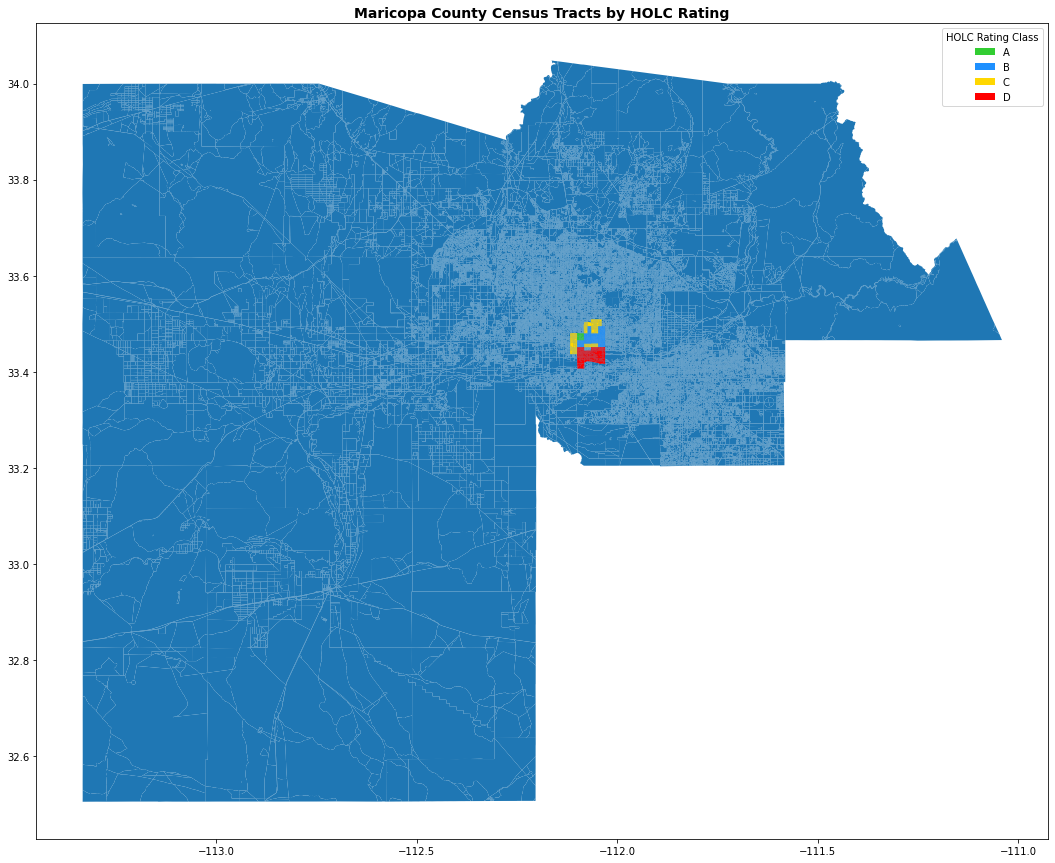

In [38]:
from matplotlib.patches import Patch

maricopa_tracts = az_spatial_data[az_spatial_data['COUNTYFP10'] == '013']
spatial_census_data = spatial_census_data[spatial_census_data['COUNTYFP10'] == '013']

cmap = {'A': 'limegreen', 'B': 'dodgerblue', 'C': 'gold', 'D': 'red'}
colors = spatial_census_data['class1'].map(cmap)

fig, ax = plt.subplots(1, 1, figsize=(20, 15))
maricopa_tracts.plot(ax=ax)

spatial_census_data.plot(color=colors, ax=ax, legend=True)

legend_labels = [Patch(facecolor=color, label=label) for label, color in cmap.items()]
plt.legend(handles=legend_labels, title="HOLC Rating Class")

plt.title('Maricopa County Census Tracts by HOLC Rating', fontweight="bold", fontsize=14)

plt.show()

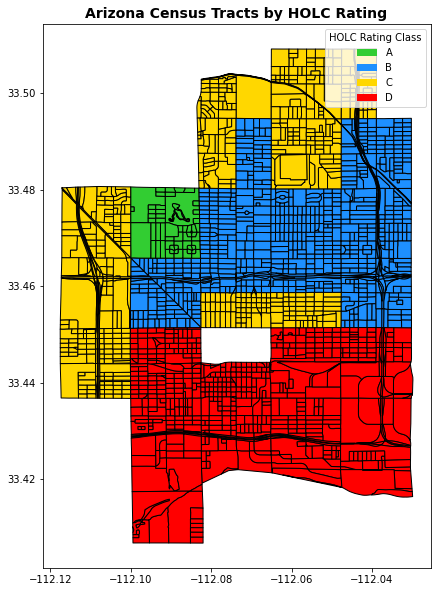

In [39]:
cmap = {'A': 'limegreen', 'B': 'dodgerblue', 'C': 'gold', 'D': 'red'}

colors = spatial_census_data['class1'].map(cmap)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
spatial_census_data.plot(color=colors, edgecolor='black', ax=ax, legend=True)

legend_labels = [Patch(facecolor=color, label=label) for label, color in cmap.items()]
plt.legend(handles=legend_labels, title="HOLC Rating Class")

plt.title('Arizona Census Tracts by HOLC Rating', fontweight="bold", fontsize=14)

plt.show()

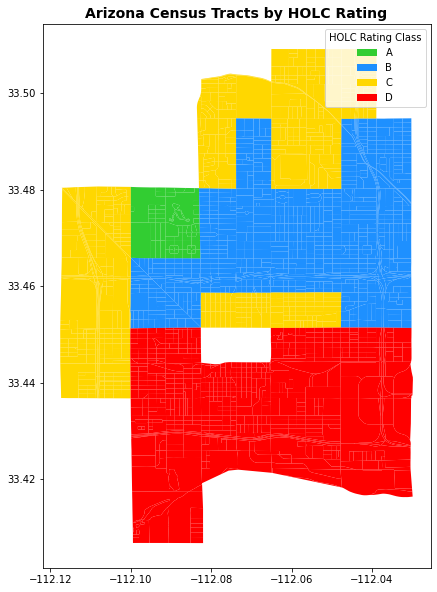

In [40]:
#colormap
cmap = {'A': 'limegreen', 'B': 'dodgerblue', 'C': 'gold', 'D': 'red'}

colors = spatial_census_data['class1'].map(cmap)

#plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
spatial_census_data.plot(color=colors, ax=ax, legend=True)

#legend
from matplotlib.patches import Patch
legend_labels = [Patch(facecolor=color, label=label) for label, color in cmap.items()]
plt.legend(handles=legend_labels, title="HOLC Rating Class")
#ax.set_axis_off()

plt.title('Arizona Census Tracts by HOLC Rating', fontweight = "bold", fontsize = 14)
plt.show()


## Plotting asthma
Now that we have the census tracts that correlate with the HOLC data, I can use census tract data to see the health in each neighborhood by grade. I will be examining asthma prevalence in these census tracts among adults who are older than 18 years. The dataset `500_Cities__Current_asthma_among_adults_aged___18_years_20240302.csv` is from the CDC. According to the CDC, environmental triggers can cause or exacerbate asthma. This data was taken in 2017 which means it is based on the 2010 census tracts.

In [41]:
census_health_df = pd.read_csv("500_Cities__Current_asthma_among_adults_aged___18_years_20240302.csv")
census_health_df.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,CA,California,Livermore,City,BRFSS,Health Outcomes,0641992,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,8.9,8.8,9.0,NaN,NaN,80968,"(37.6865101361, -121.764357841)",HLTHOUT,CASTHMA,641992.0,NaN,Current Asthma
1,2017,CA,California,Compton,City,BRFSS,Health Outcomes,0615044,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.9,10.7,11.0,NaN,NaN,96455,"(33.892965693, -118.227506568)",HLTHOUT,CASTHMA,615044.0,NaN,Current Asthma
2,2017,FL,Florida,Melbourne,City,BRFSS,Health Outcomes,1243975,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,8.5,8.4,8.6,NaN,NaN,76068,"(28.1158805782, -80.6508814613)",HLTHOUT,CASTHMA,1243975.0,NaN,Current Asthma
3,2017,FL,Florida,Miami Gardens,Census Tract,BRFSS,Health Outcomes,1245060-12086010009,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,8.5,8.0,9.0,NaN,NaN,7668,"(25.9548671603, -80.2703774181)",HLTHOUT,CASTHMA,1245060.0,1.208601e+10,Current Asthma
4,2017,CA,California,Tracy,City,BRFSS,Health Outcomes,0680238,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,9.0,8.9,9.1,NaN,NaN,82922,"(37.7243277375, -121.444621463)",HLTHOUT,CASTHMA,680238.0,NaN,Current Asthma


In [42]:
#narrow to az
az_census_health_df = census_health_df[census_health_df["StateAbbr"] == "AZ"]

#remove NaN values
az_census_health_df['TractFIPS'] = pd.to_numeric(az_census_health_df['TractFIPS'], errors='coerce')
az_census_health_df.dropna(subset=['TractFIPS'], inplace=True)

#adjust TractFIPS values for future merging
az_census_health_df['TractFIPS'] = az_census_health_df['TractFIPS'].apply(lambda x: str(int(x))[4:])

az_census_health_df.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
33,2017,AZ,Arizona,Gilbert,Census Tract,BRFSS,Health Outcomes,0427400-04013814600,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.1,9.7,10.6,NaN,NaN,4213,"(33.3206670384, -111.746778126)",HLTHOUT,CASTHMA,427400.0,814600,Current Asthma
48,2017,AZ,Arizona,Chandler,Census Tract,BRFSS,Health Outcomes,0412000-04013811900,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,9.3,8.8,9.9,NaN,NaN,5544,"(33.2838619534, -111.867442715)",HLTHOUT,CASTHMA,412000.0,811900,Current Asthma
53,2017,AZ,Arizona,Glendale,Census Tract,BRFSS,Health Outcomes,0427820-04013092710,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.5,10.0,11.1,NaN,NaN,4269,"(33.5304555128, -112.246337949)",HLTHOUT,CASTHMA,427820.0,092710,Current Asthma
54,2017,AZ,Arizona,Gilbert,Census Tract,BRFSS,Health Outcomes,0427400-04013422511,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.0,9.5,10.6,NaN,NaN,2917,"(33.3431491968, -111.764237079)",HLTHOUT,CASTHMA,427400.0,422511,Current Asthma
63,2017,AZ,Arizona,Gilbert,Census Tract,BRFSS,Health Outcomes,0427400-04013814400,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.0,9.4,10.7,NaN,NaN,4909,"(33.3283006196, -111.781491834)",HLTHOUT,CASTHMA,427400.0,814400,Current Asthma


In [43]:
#merge census health data with spatial HOLC-census data

#formatting
az_census_health_df['TractFIPS'] = az_census_health_df['TractFIPS'].apply(lambda x: str(int(x)))

spatial_census_data['geoid10'] = spatial_census_data['geoid10'].astype(str)

#merge
health_holc_census_df = pd.merge(spatial_census_data, az_census_health_df, left_on='geoid10', right_on='TractFIPS')

health_holc_census_df.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,04,013,113300,3006,040131133003006,N,0,0,"POLYGON ((-112.03707 33.45271, -112.03705 33.45411, -112.03704 33.45535, -112.03694 33.45535, -112.03600 33.45520, -112.03599 33.45406, -112.03600 33.45293, -112.03600 33.45286, -112.03598 33.45140, -112.03696 33.45141, -112.03709 33.45141, -112.03709 33.45207, -112.03707 33.45248, -112.03707 33.45271))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
1,04,013,113300,1011,040131133001011,N,25,48,"POLYGON ((-112.04116 33.46374, -112.04219 33.46375, -112.04333 33.46375, -112.04333 33.46407, -112.04333 33.46473, -112.04211 33.46473, -112.04116 33.46473, -112.04116 33.46469, -112.04116 33.46374))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
2,04,013,113300,1009,040131133001009,N,36,81,"POLYGON ((-112.04334 33.46576, -112.04333 33.46489, -112.04333 33.46473, -112.04550 33.46473, -112.04657 33.46473, -112.04770 33.46474, -112.04769 33.46574, -112.04717 33.46573, -112.04631 33.46574, -112.04550 33.46576, -112.04527 33.46576, -112.04424 33.46576, -112.04334 33.46576))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
3,04,013,113300,1008,040131133001008,N,0,0,"POLYGON ((-112.04116 33.46473, -112.04211 33.46473, -112.04333 33.46473, -112.04333 33.46489, -112.04334 33.46576, -112.04259 33.46576, -112.04156 33.46576, -112.04116 33.46576, -112.04115 33.46480, -112.04116 33.46473))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
4,04,013,113300,2021,040131133002021,N,4,11,"POLYGON ((-112.04555 33.45509, -112.04555 33.45420, -112.04554 33.45293, -112.04671 33.45293, -112.04768 33.45293, -112.04768 33.45335, -112.04769 33.45413, -112.04768 33.45484, -112.04659 33.45484, -112.04646 33.45484, -112.04632 33.45486, -112.04611 33.45491, -112.04588 33.45498, -112.04555 33.45509))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current

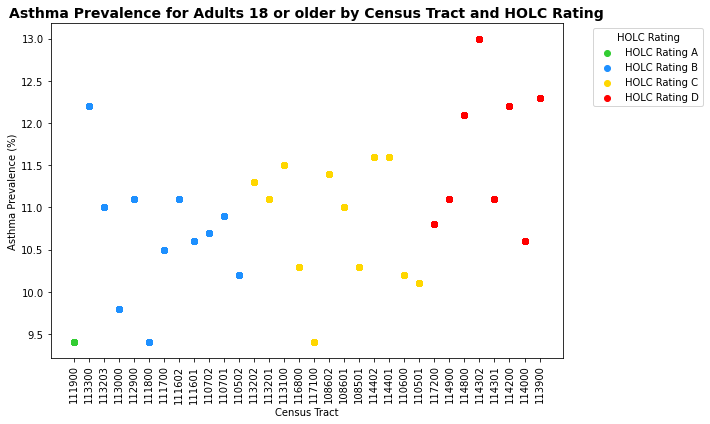

In [44]:
#visualization

cmap = {'A': 'limegreen', 'B': 'dodgerblue', 'C': 'gold', 'D': 'red'}
colors = health_holc_census_df['class1'].map(cmap)

#plot
plt.figure(figsize=(10, 6))


for rating, color in cmap.items():
    #filter data
    rated_data = health_holc_census_df[health_holc_census_df['class1'] == rating]

    #plot
    plt.scatter(rated_data['geoid10'], rated_data['Data_Value'], color=color, label=f'HOLC Rating {rating}')

plt.xlabel('Census Tract')
plt.ylabel('Asthma Prevalence (%)')
plt.title('Asthma Prevalence for Adults 18 or older by Census Tract and HOLC Rating', fontweight = "bold", fontsize = 14)
plt.xticks(rotation=90)

plt.legend(title="HOLC Rating", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

As shown above, asthma prevalence has a slight gradual increase correlating with the HOLC ratings with the A neighborhood having one of the lowest asthma prevalence and the D neighbohood having the highest.

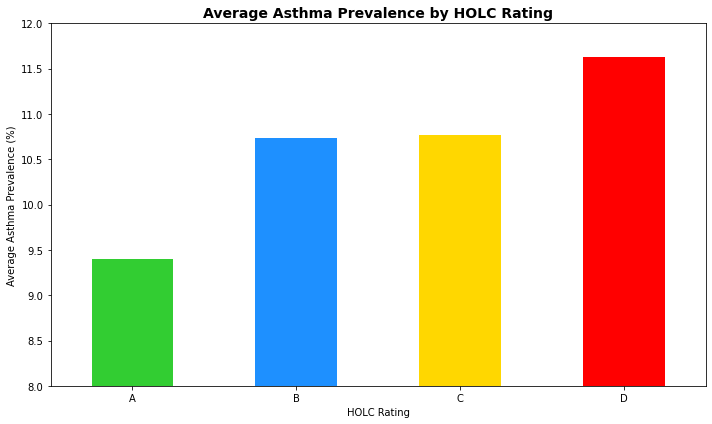

In [45]:
avg_asthma_by_holc = health_holc_census_df.groupby('class1')['Data_Value'].mean().reindex(['A', 'B', 'C', 'D'])

cmap = ['limegreen', 'dodgerblue', 'gold', 'red']

plt.figure(figsize=(10, 6))
avg_asthma_by_holc.plot(kind='bar', color=cmap)

plt.xlabel('HOLC Rating')
plt.ylabel('Average Asthma Prevalence (%)')
plt.title('Average Asthma Prevalence by HOLC Rating', fontweight='bold', fontsize=14)
plt.xticks(rotation=0)
plt.ylim(8, 12)

plt.tight_layout()
plt.show()


## Plotting Air Quality
I will be using the dataset `Daily_Census_Tract-Level_PM2.5_Concentrations__2016_-_2019_20240303.csv`. I got this dataset from the CDC website. It contains modeled predictions of PM2.5 levels from the EPA's Downscaler model. This dataset is already filtered to the year 2017 which is the same year as the asthma prevalence data, as well as the state of Arizona.

According to the California Air Resources Board, PM2.5 is particulate matter that derives from combustion of gasoline, oil, diesel fuel or wood produce. PM2.5 is associated with the greatest proportion of adverse health effects related to air pollution.

In [46]:
air_data = pd.read_csv("Daily_Census_Tract-Level_PM2.5_Concentrations__2016_-_2019_20240303.csv")

air_data.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,DS_PM_pred,DS_PM_stdd
0,2017,01JAN2017,4,1,4001942600,-109.85437,36.74035,1.931,1.3121
1,2017,01JAN2017,4,1,4001942700,-109.36640,36.75289,2.035,1.4259
2,2017,01JAN2017,4,1,4001944000,-109.14591,35.95559,0.989,0.4884
3,2017,01JAN2017,4,1,4001944100,-109.31333,36.38686,1.372,0.7923
4,2017,01JAN2017,4,1,4001944201,-109.68640,36.17172,1.302,0.7185


In [47]:
#filter to county where HOLC neighborhood data is present
air_data = air_data[air_data['countyfips'] == 13]

#filter countyfips for merging
air_data['ctfips'] = air_data['ctfips'].astype(str)
air_data['ctfips'] = air_data['ctfips'].apply(lambda x: x.zfill(11))
air_data['ctfips'] = air_data['ctfips'].apply(lambda x: x[5:])
air_data.head()

,year,date,statefips,countyfips,ctfips,latitude,longitude,DS_PM_pred,DS_PM_stdd
113,2017,01JAN2017,4,13,010101,-111.73020,33.74816,3.449,1.6482
114,2017,01JAN2017,4,13,010102,-111.54689,33.74348,2.581,1.2597
115,2017,01JAN2017,4,13,030401,-111.91672,33.81681,4.024,1.8578
116,2017,01JAN2017,4,13,030402,-111.93683,33.86002,3.911,1.9163
117,2017,01JAN2017,4,13,040502,-112.74644,33.97563,5.020,2.8559


In [48]:
#merge air_data and previous spatial_census_data to narrow air_data to HOLC census tracts

air_spatial_data = pd.merge(air_data, spatial_census_data, left_on='ctfips', right_on='geoid10')

#aggregate based on census tract to find mean air quality for the year for each census tract
agg_air_quality = air_spatial_data.groupby('ctfips')['DS_PM_pred'].mean().reset_index()

#merge agg_air_quality with spatial_census_data to have HOLC ratings for census tract
merged_data = pd.merge(agg_air_quality, spatial_census_data, left_on='ctfips', right_on='geoid10', how='left')

merged_data.head()

,ctfips,DS_PM_pred,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D
0,108501,8.193189,04,013,108501,1010,040131085011010,N,17,39,"POLYGON ((-112.04757 33.50104, -112.04540 33.50106, -112.04540 33.50016, -112.04758 33.50014, -112.04757 33.50104))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
1,108501,8.193189,04,013,108501,2020,040131085012020,N,22,33,"POLYGON ((-112.04110 33.49659, -112.04107 33.49665, -112.04107 33.49669, -112.04107 33.49837, -112.03998 33.49838, -112.03998 33.49769, -112.03999 33.49663, -112.04093 33.49663, -112.04099 33.49662, -112.04105 33.49661, -112.04110 33.49659))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
2,108501,8.193189,04,013,108501,1012,040131085011012,N,18,28,"POLYGON ((-112.04759 33.49835, -112.04759 33.49923, -112.04541 33.49925, -112.04541 33.49838, -112.04580 33.49838, -112.04708 33.49836, -112.04759 33.49835))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
3,108501,8.193189,04,013,108501,2012,040131085012012,N,29,59,"POLYGON ((-112.04214 33.50018, -112.04323 33.50017, -112.04322 33.50133, -112.04322 33.50175, -112.04321 33.50199, -112.04204 33.50199, -112.04105 33.50199, -112.04105 33.50110, -112.04198 33.50109, -112.04201 33.50109, -112.04206 33.50108, -112.04210 33.50105, -112.04212 33.50103, -112.04214 33.50099, -112.04214 33.50018))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
4,108501,8.193189,04,013,108501,2021,040131085012021,N,18,51,"POLYGON ((-112.03999 33.49663, -112.03998 33.49769, -112.03998 33.49838, -112.03889 33.49839, -112.03890 33.49664, -112.03999 33.49663))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0


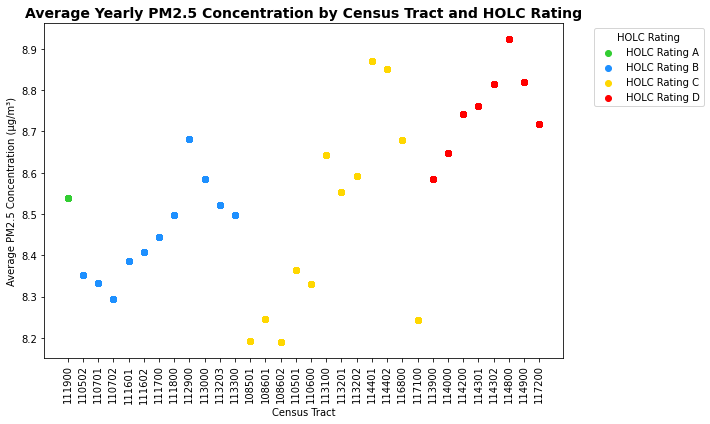

In [49]:
#visualization
cmap = {'A': 'limegreen', 'B': 'dodgerblue', 'C': 'gold', 'D': 'red'}
colors = merged_data['class1'].map(cmap)


plt.figure(figsize=(10, 6))

for rating, color in cmap.items():
    #filter by HOLC rating
    rated_data = merged_data[merged_data['class1'] == rating]

    #plot average PM2.5 concentration for each census tract, color-coded by HOLC rating
    plt.scatter(rated_data['geoid10'], rated_data['DS_PM_pred'], color=color, label=f'HOLC Rating {rating}')

plt.xlabel('Census Tract')
plt.ylabel('Average PM2.5 Concentration (μg/m³)')
plt.title('Average Yearly PM2.5 Concentration by Census Tract and HOLC Rating', fontweight = "bold", fontsize = 14)

plt.xticks(rotation=90)
plt.legend(title="HOLC Rating", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


The above plot depicts the Average Yearly PM2.5 Concentration by Census Tract and HOLC Rating. It shows that C neighborhoods have the lowest average pm2.5 concentration while D neighborhoods have the highest.

In [50]:
avg_pm25_by_holc = merged_data.groupby('class1')['DS_PM_pred'].mean().sort_index()

avg_pm25_by_holc

class1
A    8.539658
B    8.476539
C    8.526383
D    8.757904
Name: DS_PM_pred, dtype: float64

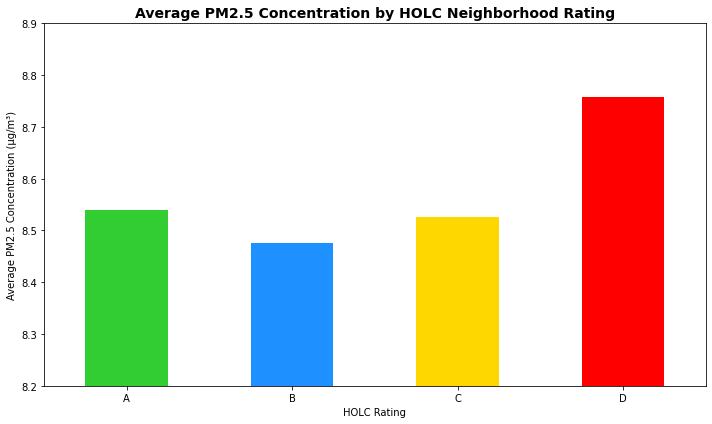

In [51]:
plt.figure(figsize=(10, 6))
avg_pm25_by_holc.plot(kind='bar', color=['limegreen', 'dodgerblue', 'gold', 'red'])

plt.xlabel('HOLC Rating')
plt.ylabel('Average PM2.5 Concentration (μg/m³)')
plt.title('Average PM2.5 Concentration by HOLC Neighborhood Rating', fontweight = "bold", fontsize = 14)
plt.xticks(rotation=0)
plt.ylim(8.2,8.9)

plt.tight_layout()
plt.show()


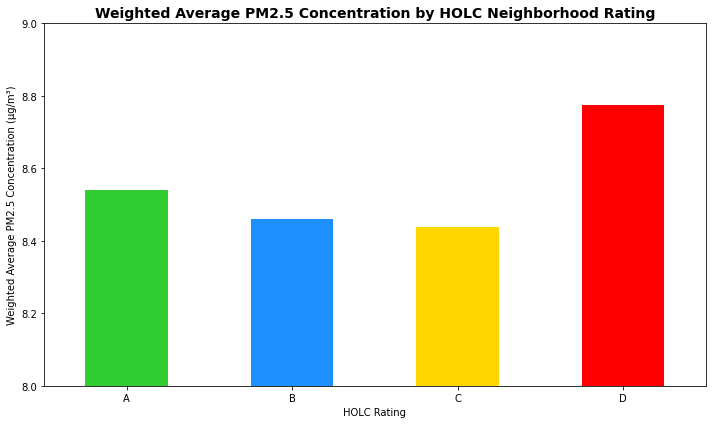

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame

# Group by 'class1' and calculate the weighted average of 'DS_PM_pred'
weighted_avg_pm25_by_holc = merged_data.groupby('class1').apply(
    lambda x: (x['DS_PM_pred'] * x['POP10']).sum() / x['POP10'].sum()
).sort_index()

# Creating the plot
plt.figure(figsize=(10, 6))
colors = ['limegreen', 'dodgerblue', 'gold', 'red']  # Colors for each HOLC rating
weighted_avg_pm25_by_holc.plot(kind='bar', color=colors)

# Customize the plot
plt.xlabel('HOLC Rating')
plt.ylabel('Weighted Average PM2.5 Concentration (μg/m³)')
plt.title('Weighted Average PM2.5 Concentration by HOLC Neighborhood Rating', fontweight="bold", fontsize=14)
plt.xticks(rotation=0)
plt.ylim(8,9)  # Adjust y-axis limits

plt.tight_layout()
plt.show()


The above plot shows that D neighborhoods have a slightly higher PM2.5 concentration than A, B, and C neighborhoods.

In [53]:
#merged_data has agg_air_quality with spatial_census_data to have HOLC ratings for census tract
merged_data.head()


,ctfips,DS_PM_pred,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D
0,108501,8.193189,04,013,108501,1010,040131085011010,N,17,39,"POLYGON ((-112.04757 33.50104, -112.04540 33.50106, -112.04540 33.50016, -112.04758 33.50014, -112.04757 33.50104))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
1,108501,8.193189,04,013,108501,2020,040131085012020,N,22,33,"POLYGON ((-112.04110 33.49659, -112.04107 33.49665, -112.04107 33.49669, -112.04107 33.49837, -112.03998 33.49838, -112.03998 33.49769, -112.03999 33.49663, -112.04093 33.49663, -112.04099 33.49662, -112.04105 33.49661, -112.04110 33.49659))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
2,108501,8.193189,04,013,108501,1012,040131085011012,N,18,28,"POLYGON ((-112.04759 33.49835, -112.04759 33.49923, -112.04541 33.49925, -112.04541 33.49838, -112.04580 33.49838, -112.04708 33.49836, -112.04759 33.49835))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
3,108501,8.193189,04,013,108501,2012,040131085012012,N,29,59,"POLYGON ((-112.04214 33.50018, -112.04323 33.50017, -112.04322 33.50133, -112.04322 33.50175, -112.04321 33.50199, -112.04204 33.50199, -112.04105 33.50199, -112.04105 33.50110, -112.04198 33.50109, -112.04201 33.50109, -112.04206 33.50108, -112.04210 33.50105, -112.04212 33.50103, -112.04214 33.50099, -112.04214 33.50018))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0
4,108501,8.193189,04,013,108501,2021,040131085012021,N,18,51,"POLYGON ((-112.03999 33.49663, -112.03998 33.49769, -112.03998 33.49838, -112.03889 33.49839, -112.03890 33.49664, -112.03999 33.49663))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0


In [54]:
health_holc_census_df.head()

,STATEFP10,COUNTYFP10,TRACTCE10,BLOCKCE,BLOCKID10,PARTFLG,HOUSING10,POP10,geometry,geoid10,class1,class1_lbl,class2,class2_lbl,class2_red,class3,class3_lbl,area_total,area_rated,area_U,area_A,area_B,area_C,area_D,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,04,013,113300,3006,040131133003006,N,0,0,"POLYGON ((-112.03707 33.45271, -112.03705 33.45411, -112.03704 33.45535, -112.03694 33.45535, -112.03600 33.45520, -112.03599 33.45406, -112.03600 33.45293, -112.03600 33.45286, -112.03598 33.45140, -112.03696 33.45141, -112.03709 33.45141, -112.03709 33.45207, -112.03707 33.45248, -112.03707 33.45271))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
1,04,013,113300,1011,040131133001011,N,25,48,"POLYGON ((-112.04116 33.46374, -112.04219 33.46375, -112.04333 33.46375, -112.04333 33.46407, -112.04333 33.46473, -112.04211 33.46473, -112.04116 33.46473, -112.04116 33.46469, -112.04116 33.46374))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
2,04,013,113300,1009,040131133001009,N,36,81,"POLYGON ((-112.04334 33.46576, -112.04333 33.46489, -112.04333 33.46473, -112.04550 33.46473, -112.04657 33.46473, -112.04770 33.46474, -112.04769 33.46574, -112.04717 33.46573, -112.04631 33.46574, -112.04550 33.46576, -112.04527 33.46576, -112.04424 33.46576, -112.04334 33.46576))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
3,04,013,113300,1008,040131133001008,N,0,0,"POLYGON ((-112.04116 33.46473, -112.04211 33.46473, -112.04333 33.46473, -112.04333 33.46489, -112.04334 33.46576, -112.04259 33.46576, -112.04156 33.46576, -112.04116 33.46576, -112.04115 33.46480, -112.04116 33.46473))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,12.2,11.4,13.0,NaN,NaN,5175,"(33.4585867396, -112.038923645)",HLTHOUT,CASTHMA,455000.0,113300,Current Asthma
4,04,013,113300,2021,040131133002021,N,4,11,"POLYGON ((-112.04555 33.45509, -112.04555 33.45420, -112.04554 33.45293, -112.04671 33.45293, -112.04768 33.45293, -112.04768 33.45335, -112.04769 33.45413, -112.04768 33.45484, -112.04659 33.45484, -112.04646 33.45484, -112.04632 33.45486, -112.04611 33.45491, -112.04588 33.45498, -112.04555 33.45509))",113300,B,Mainly B,B-D,"Mainly B, some D","Mainly B, some C or D",B-D-C,"Mainly B, some D, some C",2590325.3,90.838966,9.161037,0.0,48.785614,0.063796,41.989552,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013113300,Current

In [55]:
import pandas as pd

merged_data['geoid10'] = merged_data['geoid10'].astype(str).str.zfill(11)
health_holc_census_df['TractFIPS'] = health_holc_census_df['TractFIPS'].astype(str).str.zfill(11)

final_dataset = pd.merge(merged_data, health_holc_census_df, left_on='geoid10', right_on='TractFIPS', how='inner')

final_dataset.head()


,ctfips,DS_PM_pred,STATEFP10_x,COUNTYFP10_x,TRACTCE10_x,BLOCKCE_x,BLOCKID10_x,PARTFLG_x,HOUSING10_x,POP10_x,geometry_x,geoid10_x,class1_x,class1_lbl_x,class2_x,class2_lbl_x,class2_red_x,class3_x,class3_lbl_x,area_total_x,area_rated_x,area_U_x,area_A_x,area_B_x,area_C_x,area_D_x,STATEFP10_y,COUNTYFP10_y,TRACTCE10_y,BLOCKCE_y,BLOCKID10_y,PARTFLG_y,HOUSING10_y,POP10_y,geometry_y,geoid10_y,class1_y,class1_lbl_y,class2_y,class2_lbl_y,class2_red_y,class3_y,class3_lbl_y,area_total_y,area_rated_y,area_U_y,area_A_y,area_B_y,area_C_y,area_D_y,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,108501,8.193189,04,013,108501,1010,040131085011010,N,17,39,"POLYGON ((-112.04757 33.50104, -112.04540 33.50106, -112.04540 33.50016, -112.04758 33.50014, -112.04757 33.50104))",00000108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0,04,013,108501,1010,040131085011010,N,17,39,"POLYGON ((-112.04757 33.50104, -112.04540 33.50106, -112.04540 33.50016, -112.04758 33.50014, -112.04757 33.50104))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013108501,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.3,9.7,10.9,NaN,NaN,2250,"(33.5019821175, -112.04322397)",HLTHOUT,CASTHMA,455000.0,00000108501,Current Asthma
1,108501,8.193189,04,013,108501,1010,040131085011010,N,17,39,"POLYGON ((-112.04757 33.50104, -112.04540 33.50106, -112.04540 33.50016, -112.04758 33.50014, -112.04757 33.50104))",00000108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0,04,013,108501,2020,040131085012020,N,22,33,"POLYGON ((-112.04110 33.49659, -112.04107 33.49665, -112.04107 33.49669, -112.04107 33.49837, -112.03998 33.49838, -112.03998 33.49769, -112.03999 33.49663, -112.04093 33.49663, -112.04099 33.49662, -112.04105 33.49661, -112.04110 33.49659))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013108501,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.3,9.7,10.9,NaN,NaN,2250,"(33.5019821175, -112.04322397)",HLTHOUT,CASTHMA,455000.0,00000108501,Current Asthma
2,108501,8.193189,04,013,108501,1010,040131085011010,N,17,39,"POLYGON ((-112.04757 33.50104, -112.04540 33.50106, -112.04540 33.50016, -112.04758 33.50014, -112.04757 33.50104))",00000108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0,04,013,108501,1012,040131085011012,N,18,28,"POLYGON ((-112.04759 33.49835, -112.04759 33.49923, -112.04541 33.49925, -112.04541 33.49838, -112.04580 33.49838, -112.04708 33.49836, -112.04759 33.49835))",108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0,2017,AZ,Arizona,Phoenix,Census Tract,BRFSS,Health Outcomes,0455000-04013108501,Current asthma among adults aged >=18 Years,%,CrdPrv,Crude prevalence,10.3,9.7,10.9,NaN,NaN,2250,"(33.5019821175, -112.04322397)",HLTHOUT,CASTHMA,455000.0,00000108501,Current Asthma
3,108501,8.193189,04,013,108501,1010,040131085011010,N,17,39,"POLYGON ((-112.04757 33.50104, -112.04540 33.50106, -112.04540 33.50016, -112.04758 33.50014, -112.04757 33.50104))",00000108501,C,Mainly C,C,Mainly C,Only C,C,Mainly C,1295679.1,42.731281,57.268719,0.0,0.0,42.731281,0.0,04,013,108501,2012,040131085012012,N,29,59,"POLYGON ((-112.04214 33.50018, -112.04323 33.50017, -112.04322 33.50133, -112.04322 33.50175, -112.04321 33.50199, -112.04204 33.50199, -112.04105 33.50199, -112.04105 33.50110, -112.04198 33.50109, -112.04201 33.50109, -112.04206

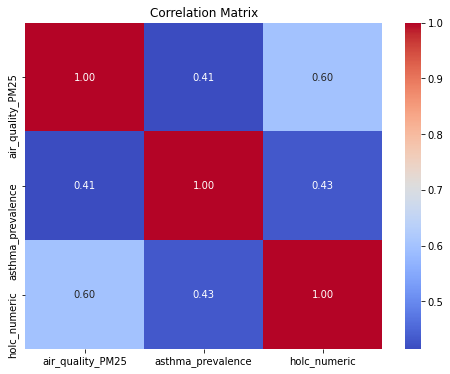

In [56]:
import seaborn as sns
data = final_dataset.copy()

data.rename(columns={'DS_PM_pred': 'air_quality_PM25', 'Data_Value': 'asthma_prevalence'}, inplace=True)
holc_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4}
data['holc_numeric'] = data['class1_x'].map(holc_mapping)
corr_matrix = data[['air_quality_PM25', 'asthma_prevalence', 'holc_numeric']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Variables used:
air_quality_PM25: represents air quality data related to particulate matter of size 2.5 micrometers or smaller (PM2.5).
asthma_prevalence:  prevalence of asthma within each HOLC district
holc_numeric: a numeric representation of the HOLC (Home Owners' Loan Corporation) rating, which historically graded neighborhoods on their "desirability" with implications for investment and lending.

### Analysis
Air Quality and Asthma Prevalence: correlation coefficient of 0.41, suggesting a moderate positive correlation. As air quality worsens (higher PM2.5 levels), the prevalence of asthma also increases.

Air Quality and HOLC Rating: correlation coefficient of 0.60, which is a relatively strong positive correlation. Areas with worse HOLC ratings (higher numeric values, meaning lower desirability) have poorer air quality.

Asthma Prevalence and HOLC Rating: correlation coefficient of 0.43, there's a moderate positive correlation between these two variables. Areas with worse HOLC ratings might see a higher prevalence of asthma.

### Conclusion
This correlation matrix shows that lower-graded HOLC areas have a higher association with poor air quality and higher asthma prevalence.

# Economic Impact

In [57]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

data = pd.read_excel('nhgis0012_ds262_20225_county.xlsx')
counties = pd.read_excel('uscounties.xlsx')
data2 = pd.read_excel('nhgis0012_ds263_20225_county.xlsx')
merge = pd.merge(data, data2, on='COUNTY')
merged_data = pd.merge(merge, counties, left_on='COUNTY', right_on='county_full')
merged_data['geometry'] = [Point(lon, lat) for lon, lat in zip(merged_data['lng'], merged_data['lat'])]

gdf_merged_data = gpd.GeoDataFrame(merged_data, geometry='geometry')

new_gdf = gdf_merged_data.sjoin(maps, how="inner", op='within')

new_gdf.reset_index(drop=True, inplace=True)

new_gdf = new_gdf[new_gdf['residential']]
new_gdf = new_gdf[new_gdf['residential'].fillna(False)]

new_gdf['grade'].replace('', float('nan'), inplace=True)
nan_rows = new_gdf[new_gdf['grade'].isna()].head()
new_gdf['grade'].fillna('unrated', inplace=True)

In [58]:
new_gdf['grade'].replace('', float('nan'), inplace=True)
nan_rows = new_gdf[new_gdf['grade'].isna()].head()
new_gdf['grade'].fillna('unrated', inplace=True)

In [59]:
new_gdf

,GISJOIN_x,YEAR_x,STUSAB_x,STATE_x,STATEA_x,COUNTY,COUNTYA_x,GEO_ID_x,TL_GEO_ID_x,NAME_E_x,AQNGE001,AQNGE002,AQNGE003,AQNGE004,AQNGE005,AQNGE006,AQNGE007,AQNGE008,AQNGE009,AQNGE010,AQPKE001,AQPKE002,AQPKE003,AQPKE004,AQPKE005,AQPKE006,AQPKE007,AQPKE008,AQPKE009,AQPKE010,AQPKE011,AQPKE012,AQPKE013,AQPKE014,AQPKE015,AQPKE016,AQPKE017,AQPKE018,AQPKE019,AQPKE020,AQPKE021,AQPKE022,AQPKE023,AQPKE024,AQPKE025,AQPZE001,AQPZE002,AQPZE003,AQPZE004,AQPZE005,AQPZE006,AQPZE007,AQPZE008,AQP6E001,NAME_M_x,AQNGM001,AQNGM002,AQNGM003,AQNGM004,AQNGM005,AQNGM006,AQNGM007,AQNGM008,AQNGM009,AQNGM010,AQPKM001,AQPKM002,AQPKM003,AQPKM004,AQPKM005,AQPKM006,AQPKM007,AQPKM008,AQPKM009,AQPKM010,AQPKM011,AQPKM012,AQPKM013,AQPKM014,AQPKM015,AQPKM016,AQPKM017,AQPKM018,AQPKM019,AQPKM020,AQPKM021,AQPKM022,AQPKM023,AQPKM024,AQPKM025,AQPZM001,AQPZM002,AQPZM003,AQPZM004,AQPZM005,AQPZM006,AQPZM007,AQPZM008,AQP6M001,GISJOIN_y,YEAR_y,STUSAB_y,STATE_y,STATEA_y,COUNTYA_y,GEO_ID_y,TL_GEO_ID_y,NAME_E_y,AQ6WE001,AQ6WE002,AQ6WE003,AQ6WE004,AQ6WE005,AQ6WE006,AQ6WE007,AQ6WE008,AQ6WE009,AQ6WE010,AQ6WE011,AQ6WE012,AQ6WE013,AQ6WE014,AQ6WE015,AQ6WE016,AQ6WE017,AQ8TE001,NAME_M_y,AQ6WM001,AQ6WM002,AQ6WM003,AQ6WM004,AQ6WM005,AQ6WM006,AQ6WM007,AQ6WM008,AQ6WM009,AQ6WM010,AQ6WM011,AQ6WM012,AQ6WM013,AQ6WM014,AQ6WM015,AQ6WM016,AQ6WM017,AQ8TM001,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population,geometry,index_right,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill
0,G0100470,2018-2022,AL,Alabama,1,Dallas County,47,0500000US01047,1047,"Dallas County, Alabama",38326,10634,26467,208,240,0,16,761,0,761,25984,349,0,0,0,0,72,17,12,170,81,193,520,885,916,602,9086,1218,1474,3559,2752,2633,1239,92,114,37774,3791,6439,2650,2531,2732,844,18787,37180,"Dallas County, Alabama",NaN,199,600,164,14,27,52,556,27,556,109,134,27,27,27,27,86,24,19,82,65,88,184,218,234,194,764,246,269,444,445,395,253,58,88,95,887,1083,675,706,669,336,1246,3448,G0100470,2018-2022,AL,Alabama,1,47,0500000US01047,1047,"Dallas County, Alabama",37774,10230,1767,1120,1070,4087,1674,330,182,27544,1331,1468,2132,14627,5683,1854,449,0.4894,"Dallas County, Alabama",95,1083,334,309,334,600,295,168,106,1057,263,362,382,618,378,232,154,0.0201,Dallas,Dallas,Dallas County,48113,TX,Texas,32.7666,-96.7778,2604053,POINT (-96.77780 32.76660),9015,6437,Dallas,TX,True,Definitely Declining,C,C6,True,False,False,#ffff00
1,G0100470,2018-2022,AL,Alabama,1,Dallas County,47,0500000US01047,1047,"Dallas County, Alabama",38326,10634,26467,208,240,0,16,761,0,761,25984,349,0,0,0,0,72,17,12,170,81,193,520,885,916,602,9086,1218,1474,3559,2752,2633,1239,92,114,37774,3791,6439,2650,2531,2732,844,18787,37180,"Dallas County, Alabama",NaN,199,600,164,14,27,52,556,27,556,109,134,27,27,27,27,86,24,19,82,65,88,184,218,234,194,764,246,269,444,445,395,253,58,88,95,887,1083,675,706,669,336,1246,3448,G0500390,2018-2022,AR,Arkansas,5,39,0500000US05039,5039,"Dallas County, Arkansas",6071,723,87,115,55,279,184,3,0,5348,243,320,294,2737,1154,378,222,0.4456,"Dallas County, Arkansas",19,256,65,97,36,110,78,5,18,259,65,90,129,143,100,89,75,0.0278,Dallas,Dallas,Dallas County,48113,TX,Texas,32.7666,-96.7778,2604053,POINT (-96.77780 32.76660),9015,6437,Dallas,TX,True,Definitely Declining,C,C6,True,False,False,#ffff00
2,G0100470,2018-2022,AL,Alabama,1,Dallas County,47,0500000US01047,1047,"Dallas County, Alabama",38326,10634,26467,208,240,0,16,761,0,761,25984,349,0,0,0,0,72,17,12,170,81,193,520,885,916,602,9086,1218,1474,3559,2752,2633,1239,92,114,37774,3791,6439,2650,2531,2732,844,18787,37180,"Dallas County, Alabama",NaN,199,600,164,14,27,52,556,27,556,109,134,27,27,27,27,86,24,19,82,65,88,184,218,234,194,764,246,269,444,445,395,253,58,88,95,887,1083,675,706,669,336,1246,3448,G1900490,2018-2022,IA,Iowa,19,49,0500000US19049,19049,"Dallas County, Iowa",99817,5657,591,504,427,3074,678,207,176,94160,7880,9677,7874,53161,11356,2951,1261,0.4354,"Dallas County, Iowa",56,1015,244,283,169,599,231,98,87,1021,309,532,4

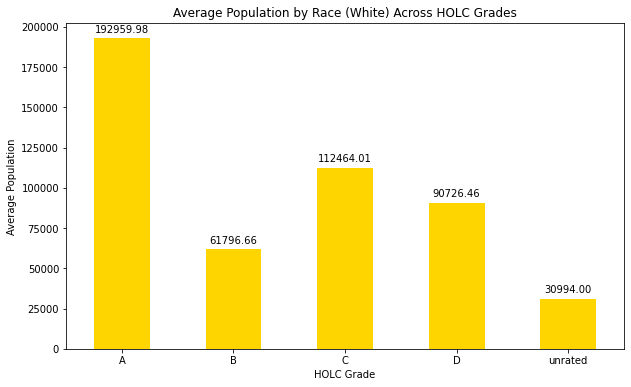

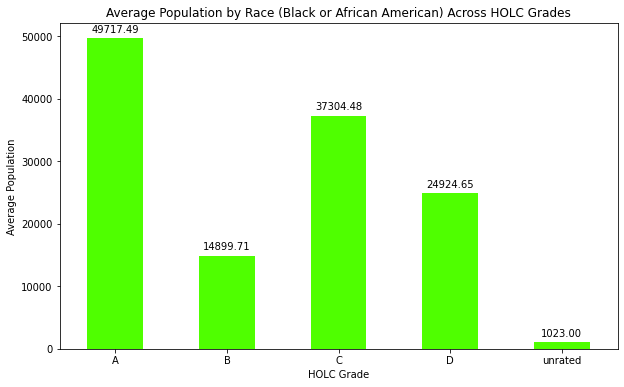

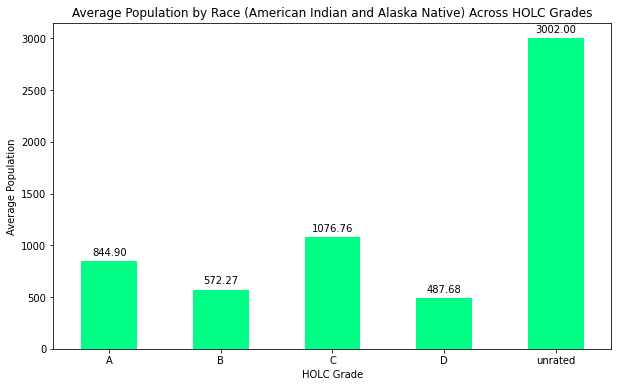

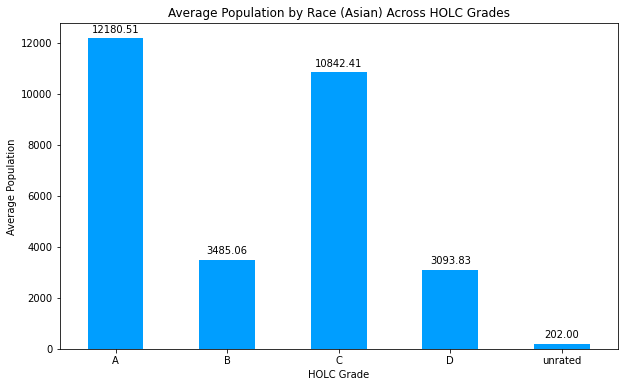

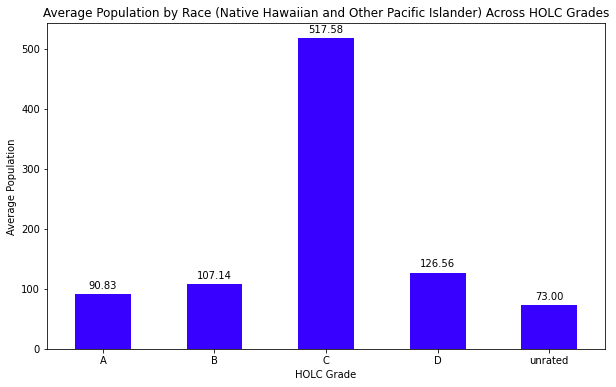

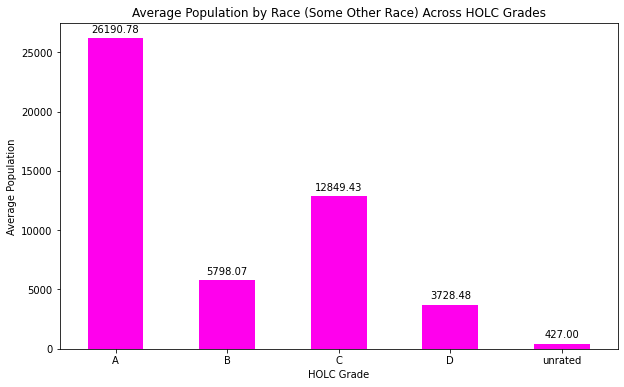

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

racial_columns = ['AQNGE002', 'AQNGE003', 'AQNGE004', 'AQNGE005', 'AQNGE006', 'AQNGE007']
racial_descriptions = [
    "White",
    "Black or African American",
    "American Indian and Alaska Native",
    "Asian",
    "Native Hawaiian and Other Pacific Islander",
    "Some Other Race"
]

palette = sns.color_palette("hsv", len(racial_columns))

for col, description, color in zip(racial_columns, racial_descriptions, palette):
    plt.figure(figsize=(10, 6))
    ax = new_gdf.groupby('grade')[col].mean().plot(kind='bar', color=color)

    plt.title(f"Average Population by Race ({description}) Across HOLC Grades")
    plt.xlabel('HOLC Grade')
    plt.ylabel('Average Population')
    plt.xticks(rotation=0)

    # Add value labels on each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha = 'center', va = 'center',
                    xytext = (0, 9),
                    textcoords = 'offset points')

    plt.show()


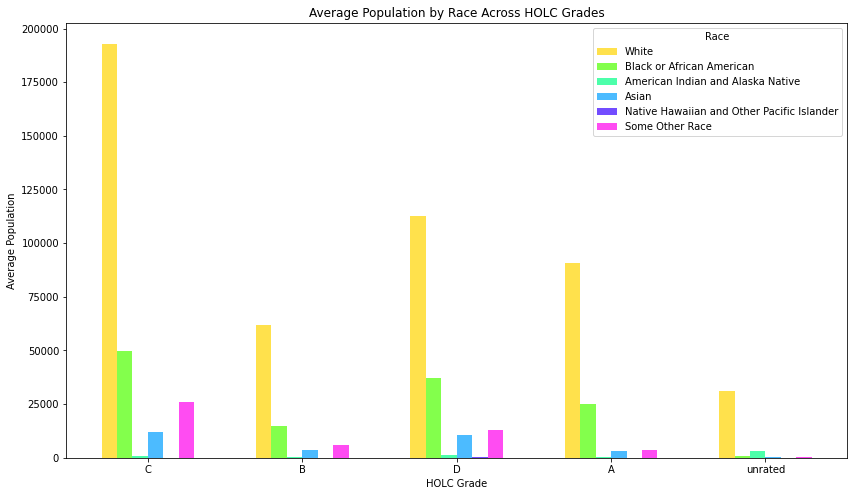

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

racial_columns = ['AQNGE002', 'AQNGE003', 'AQNGE004', 'AQNGE005', 'AQNGE006', 'AQNGE007']
racial_descriptions = [
    "White",
    "Black or African American",
    "American Indian and Alaska Native",
    "Asian",
    "Native Hawaiian and Other Pacific Islander",
    "Some Other Race"
]

palette = sns.color_palette("hsv", len(racial_columns))

plt.figure(figsize=(14, 8))  # Creating one figure for all plots

grades = new_gdf['grade'].unique()
bar_width = 0.1  # Width of each bar

for i, (col, description, color) in enumerate(zip(racial_columns, racial_descriptions, palette)):
    mean_values = new_gdf.groupby('grade')[col].mean().values
    positions = np.arange(len(grades)) + i * bar_width
    plt.bar(positions, mean_values, bar_width, color=color, alpha=0.7, label=description)

plt.title("Average Population by Race Across HOLC Grades")
plt.xlabel('HOLC Grade')
plt.ylabel('Average Population')
plt.xticks(np.arange(len(grades)) + (len(racial_columns) / 2 - 0.5) * bar_width, grades)
plt.legend(title="Race")
plt.show()


In [62]:
new_gdf['Poverty_Rate'] = (new_gdf['AQ6WE002'] / new_gdf['AQ6WE001']) * 100

new_gdf['Bachelor_or_Higher'] = (new_gdf['AQPKE022'] + new_gdf['AQPKE023'] + new_gdf['AQPKE024'] + new_gdf['AQPKE025']) / new_gdf['AQPKE001'] * 100

new_gdf['High_School_or_Equivalent'] = (new_gdf['AQPKE017'] + new_gdf['AQPKE018']) / new_gdf['AQPKE001'] * 100


new_gdf['Incomplete_High_School_or_Lower'] = (new_gdf['AQPKE002'] + new_gdf['AQPKE003'] +
                                              new_gdf['AQPKE004'] + new_gdf['AQPKE005'] +
                                              new_gdf['AQPKE006'] + new_gdf['AQPKE007'] +
                                              new_gdf['AQPKE008'] + new_gdf['AQPKE009'] +
                                              new_gdf['AQPKE010'] + new_gdf['AQPKE011'] +
                                              new_gdf['AQPKE012'] + new_gdf['AQPKE013'] +
                                              new_gdf['AQPKE014'] + new_gdf['AQPKE015'] +
                                              new_gdf['AQPKE016']) / new_gdf['AQPKE001'] * 100

new_gdf['Zero_Education'] = new_gdf['AQPKE002'] / new_gdf['AQPKE001'] * 100

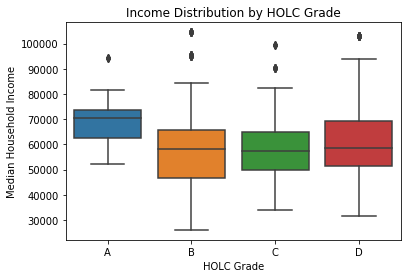

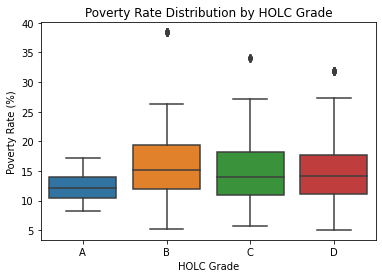

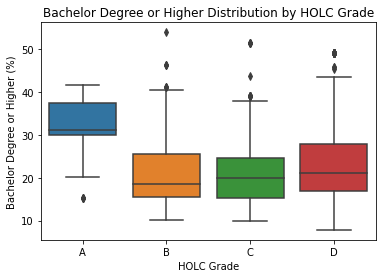

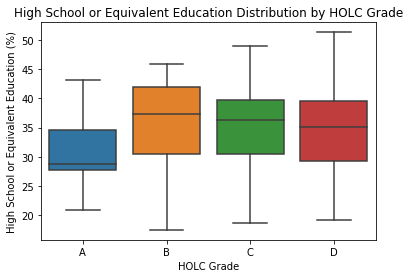

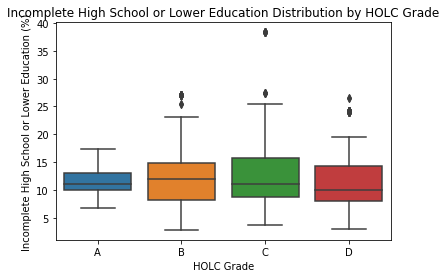

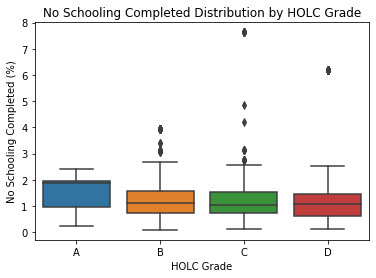

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

grade_order = ['A', 'B', 'C', 'D']

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]

sns.boxplot(x='grade', y='AQP6E001', data=new_gdf, order=grade_order, palette=colors)
plt.title('Income Distribution by HOLC Grade')
plt.ylabel('Median Household Income')
plt.xlabel('HOLC Grade')
plt.show()

sns.boxplot(x='grade', y='Poverty_Rate', data=new_gdf, order=grade_order, palette=colors)
plt.title('Poverty Rate Distribution by HOLC Grade')
plt.ylabel('Poverty Rate (%)')
plt.xlabel('HOLC Grade')
plt.show()

sns.boxplot(x='grade', y='Bachelor_or_Higher', data=new_gdf, order=grade_order, palette=colors)
plt.title('Bachelor Degree or Higher Distribution by HOLC Grade')
plt.ylabel('Bachelor Degree or Higher (%)')
plt.xlabel('HOLC Grade')
plt.show()

sns.boxplot(x='grade', y='High_School_or_Equivalent', data=new_gdf, order=grade_order, palette=colors)
plt.title('High School or Equivalent Education Distribution by HOLC Grade')
plt.ylabel('High School or Equivalent Education (%)')
plt.xlabel('HOLC Grade')
plt.show()

sns.boxplot(x='grade', y='Incomplete_High_School_or_Lower', data=new_gdf, order=grade_order, palette=colors)
plt.title('Incomplete High School or Lower Education Distribution by HOLC Grade')
plt.ylabel('Incomplete High School or Lower Education (%)')
plt.xlabel('HOLC Grade')
plt.show()

sns.boxplot(x='grade', y='Zero_Education', data=new_gdf, order=grade_order, palette=colors)
plt.title('No Schooling Completed Distribution by HOLC Grade')
plt.ylabel('No Schooling Completed (%)')
plt.xlabel('HOLC Grade')
plt.show()


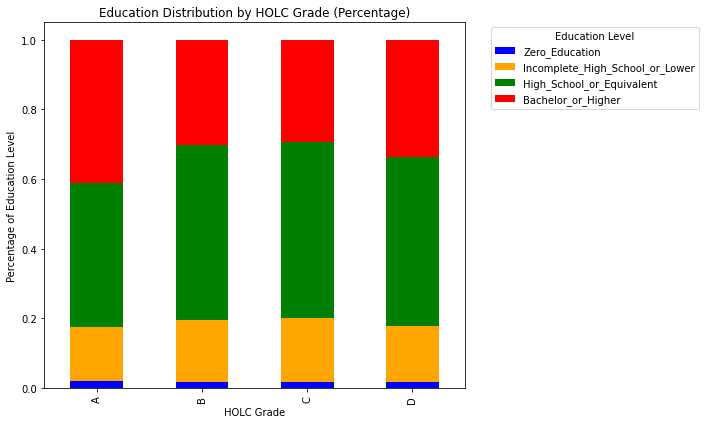

In [64]:
education_columns = ['Zero_Education', 'Incomplete_High_School_or_Lower', 'High_School_or_Equivalent', 'Bachelor_or_Higher']
grade_groups = new_gdf.groupby('grade')[education_columns].sum()
grade_groups_percentage = grade_groups.div(grade_groups.sum(axis=1), axis=0)
grade_groups_percentage = grade_groups_percentage.reindex(grade_order)

custom_colors = ['blue', 'orange', 'green', 'red']  # Specify custom colors here

grade_groups_percentage.plot(kind='bar', stacked=True, figsize=(10, 6), color=custom_colors)

plt.title('Education Distribution by HOLC Grade (Percentage)')
plt.ylabel('Percentage of Education Level')
plt.xlabel('HOLC Grade')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Regression RMSE: 1.025615804301899
Regression R^2: 0.968514620365317


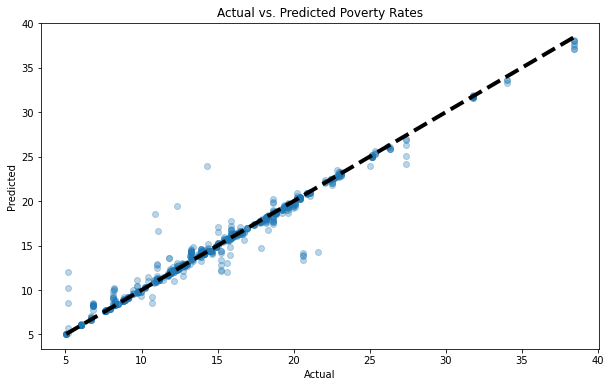

In [65]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'unrated': 0}
new_gdf['grade_numeric'] = new_gdf['grade'].map(grade_mapping)
filtered_gdf = new_gdf[new_gdf['grade_numeric'] != 0]

X_regression = filtered_gdf[['AQP6E001', 'AQ8TE001', 'Bachelor_or_Higher', 'High_School_or_Equivalent', 'Incomplete_High_School_or_Lower', 'grade_numeric']]
y_regression = filtered_gdf['Poverty_Rate']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
model_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = model_reg.predict(X_test_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f'Regression RMSE: {rmse_reg}')
print(f'Regression R^2: {r2_reg}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Poverty Rates')
plt.show()


The regression model predicted poverty rates using variables such as income and education levels, achieving an R² of 0.9685, indicating an ability to explain the variance in poverty.
These support the hypothesis that redlining might continue influence economic conditions in affected areas, corroborating on economic disparities. Ethically, the use of historical redlining data in predictive modeling raises concerns about perpetuating past injustices.
The project faced challenges such as class imbalance and potential model overfitting. Future work could explore data augmentation to address class imbalance, enhance feature engineering to capture complex relationships better, and employ more rigorous cross-validation to ensure model robustness.

Regression RMSE: 5.993615211915679
Regression R^2: -0.07526928657724619


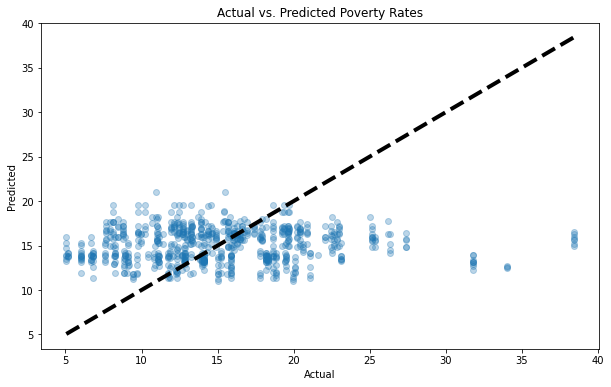

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'unrated': 0}
new_gdf['grade_numeric'] = new_gdf['grade'].map(grade_mapping)
filtered_gdf = new_gdf[new_gdf['grade_numeric'] != 0]

X_regression = filtered_gdf[['Bachelor_or_Higher', 'High_School_or_Equivalent', 'Incomplete_High_School_or_Lower', 'grade_numeric']]
y_regression = filtered_gdf['Poverty_Rate']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.3, random_state=42)

model_reg = RandomForestRegressor(n_estimators=100, random_state=42)
model_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = model_reg.predict(X_test_reg)
rmse_reg = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2_reg = r2_score(y_test_reg, y_pred_reg)

print(f'Regression RMSE: {rmse_reg}')
print(f'Regression R^2: {r2_reg}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.3)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted Poverty Rates')
plt.show()


The second model excludes income data and relies solely on educational variables and HOLC grades. The results show a considerable decrease in performance with an RMSE of 5.994 and an R² of -0.075. This negative R² value indicates that the model fails to accurately predict poverty rates and, in fact, performs worse than a simple model using the mean of the dependent variable for prediction. This significant drop in model performance without income data suggests that while education and grading are important, income levels play a critical role in determining poverty rates, and their exclusion leads to inadequate model predictions.



In [67]:
import pandas as pd
import scipy.stats as stats


grades = ['A', 'B', 'C', 'D']

# Median Income
f_value_income, p_value_income = stats.f_oneway(
    *[filtered_gdf[filtered_gdf['grade'] == grade]['AQP6E001'] for grade in grades]
)

# Poverty Rate
f_value_poverty, p_value_poverty = stats.f_oneway(
    *[filtered_gdf[filtered_gdf['grade'] == grade]['Poverty_Rate'] for grade in grades]
)

# Education
f_value_education, p_value_education = stats.f_oneway(
    *[filtered_gdf[filtered_gdf['grade'] == grade]['Bachelor_or_Higher'] for grade in grades]
)

# Gini Index
f_value_gini, p_value_gini = stats.f_oneway(
    *[filtered_gdf[filtered_gdf['grade'] == grade]['AQ8TM001'] for grade in grades]
)

# Output results
print(f"Median Income: F = {f_value_income}, p = {p_value_income:.4g}")
print(f"Poverty Rate: F = {f_value_poverty}, p = {p_value_poverty:.4g}")
print(f"Bachelor or Higher Education: F = {f_value_education}, p = {p_value_education:.4g}")
print(f"Gini Index: F = {f_value_gini}, p = {p_value_gini:.4g}")


Median Income: F = 14.77302839121205, p = 1.557e-09
Poverty Rate: F = 7.0709271718588855, p = 9.908e-05
Bachelor or Higher Education: F = 32.12551443594171, p = 2.285e-20
Gini Index: F = 6.720690119230559, p = 0.000163


In [68]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
#Gini index (income inequality)
filtered_gdf['AQ8TM001'] = pd.to_numeric(filtered_gdf['AQ8TM001'], errors='coerce')
filtered_gdf = filtered_gdf.dropna(subset=['AQ8TM001'])
tukey_results = pairwise_tukeyhsd(endog=filtered_gdf['AQ8TM001'], groups=filtered_gdf['grade'], alpha=0.05)

print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   0.0086 0.0029  0.0022   0.015   True
     A      C   0.0088 0.0025  0.0024  0.0153   True
     A      D   0.0067 0.0353  0.0003   0.013   True
     B      C   0.0002    0.9 -0.0019  0.0024  False
     B      D  -0.0019 0.0374 -0.0037 -0.0001   True
     C      D  -0.0022 0.0485 -0.0043    -0.0   True
----------------------------------------------------


In [69]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
#median income
filtered_gdf['AQP6E001'] = pd.to_numeric(filtered_gdf['AQP6E001'], errors='coerce')
filtered_gdf = filtered_gdf.dropna(subset=['AQP6E001', 'grade'])

filtered_gdf['grade'] = filtered_gdf['grade'].astype('category')
income = pairwise_tukeyhsd(endog=filtered_gdf['AQP6E001'], groups=filtered_gdf['grade'], alpha=0.05)

print(income)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
group1 group2   meandiff  p-adj     lower      upper    reject
--------------------------------------------------------------
     A      B -11090.6022  0.001  -16842.229 -5338.9754   True
     A      C -12760.1516  0.001 -18599.9142  -6920.389   True
     A      D  -9402.1915  0.001 -15159.3803 -3645.0028   True
     B      C  -1669.5494  0.116   -3595.706   256.6072  False
     B      D   1688.4107 0.0443     29.3524  3347.4689   True
     C      D   3357.9601  0.001   1415.2583  5300.6619   True
--------------------------------------------------------------


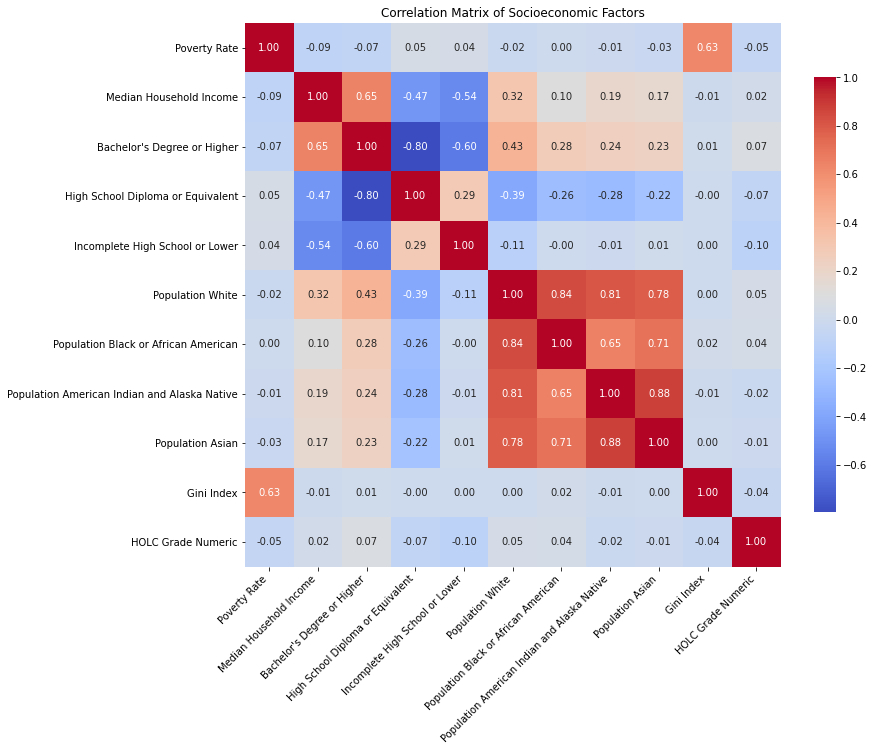

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'unrated': 0}
new_gdf['grade_numeric'] = new_gdf['grade'].map(grade_mapping)

cols_to_convert = [
    'Poverty_Rate', 'AQP6E001', 'Bachelor_or_Higher', 'High_School_or_Equivalent',
    'Incomplete_High_School_or_Lower', 'AQNGE002', 'AQNGE003', 'AQNGE004', 'AQNGE005',
    'AQ8TE001'
]

for col in cols_to_convert:
    new_gdf[col] = pd.to_numeric(new_gdf[col], errors='coerce')

new_gdf.dropna(subset=cols_to_convert + ['grade_numeric'], inplace=True)

column_names = {
    'Poverty_Rate': 'Poverty Rate',
    'AQP6E001': 'Median Household Income',
    'Bachelor_or_Higher': 'Bachelor\'s Degree or Higher',
    'High_School_or_Equivalent': 'High School Diploma or Equivalent',
    'Incomplete_High_School_or_Lower': 'Incomplete High School or Lower',
    'AQNGE002': 'Population White',
    'AQNGE003': 'Population Black or African American',
    'AQNGE004': 'Population American Indian and Alaska Native',
    'AQNGE005': 'Population Asian',
    'AQ8TE001': 'Gini Index',
    'grade_numeric': 'HOLC Grade Numeric'
}

new_gdf.rename(columns=column_names, inplace=True)

correlation_matrix = new_gdf[list(column_names.values())].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Socioeconomic Factors')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


The correlation matrix analysis shows relationships between socioeconomic factors in the dataset. A positive correlation found between poverty rates and the Gini Index, suggesting that areas with higher poverty also face greater income inequality. Educational attainment showed a negative correlation with poverty, highlighting education's potential role in economic stability. Racial demographics displayed positive correlations within groups, possibly indicating concentrated communities of similar racial or ethnic identities. Interestingly, redlining grades did not show a strong correlation with current socioeconomic conditions.
Challenges include potential data biases and the inherent limitation of correlation not implying causation. Future steps could involve a deeper multivariate analysis. Expanding the dataset and incorporating qualitative research would provide a more holistic view of the issues.

## Random Forest Model
In order to train this model, we merged all data sets, encoded HOLC grades, created the model, tested it's accuracy, and created a classification report.

In [71]:
new_gdf['FIPS'] = new_gdf['county_fips']

In [72]:
aq_data = pd.read_csv('pm2.5_all.csv')

aq_data['statefips'] = aq_data['statefips'].apply(lambda x: '{:02d}'.format(x))
aq_data['countyfips'] = aq_data['countyfips'].apply(lambda x: '{:03d}'.format(x))

aq_data['FIPS'] = aq_data['statefips'] + aq_data['countyfips']
aq_data

,year,statefips,countyfips,DS_PM_pred,FIPS
0,2017,01,001,9.624307,01001
1,2017,10,001,7.657335,10001
2,2017,11,001,9.019774,11001
3,2017,12,001,7.846296,12001
4,2017,13,001,8.737011,13001
...,...,...,...,...,...
3104,2017,51,099,7.869492,51099
3105,2017,54,099,8.417614,54099
3106,2017,55,099,5.200738,55099
3107,2017,06,099,12.429667,06099


In [73]:
new_gdf['FIPS'] = new_gdf['FIPS'].astype(str)

In [74]:
all_data = pd.merge(aq_data, new_gdf, on = 'FIPS', how = 'inner')

In [75]:
all_data

,year,statefips,countyfips,DS_PM_pred,FIPS,GISJOIN_x,YEAR_x,STUSAB_x,STATE_x,STATEA_x,COUNTY,COUNTYA_x,GEO_ID_x,TL_GEO_ID_x,NAME_E_x,AQNGE001,Population White,Population Black or African American,Population American Indian and Alaska Native,Population Asian,AQNGE006,AQNGE007,AQNGE008,AQNGE009,AQNGE010,AQPKE001,AQPKE002,AQPKE003,AQPKE004,AQPKE005,AQPKE006,AQPKE007,AQPKE008,AQPKE009,AQPKE010,AQPKE011,AQPKE012,AQPKE013,AQPKE014,AQPKE015,AQPKE016,AQPKE017,AQPKE018,AQPKE019,AQPKE020,AQPKE021,AQPKE022,AQPKE023,AQPKE024,AQPKE025,AQPZE001,AQPZE002,AQPZE003,AQPZE004,AQPZE005,AQPZE006,AQPZE007,AQPZE008,Median Household Income,NAME_M_x,AQNGM001,AQNGM002,AQNGM003,AQNGM004,AQNGM005,AQNGM006,AQNGM007,AQNGM008,AQNGM009,AQNGM010,AQPKM001,AQPKM002,AQPKM003,AQPKM004,AQPKM005,AQPKM006,AQPKM007,AQPKM008,AQPKM009,AQPKM010,AQPKM011,AQPKM012,AQPKM013,AQPKM014,AQPKM015,AQPKM016,AQPKM017,AQPKM018,AQPKM019,AQPKM020,AQPKM021,AQPKM022,AQPKM023,AQPKM024,AQPKM025,AQPZM001,AQPZM002,AQPZM003,AQPZM004,AQPZM005,AQPZM006,AQPZM007,AQPZM008,AQP6M001,GISJOIN_y,YEAR_y,STUSAB_y,STATE_y,STATEA_y,COUNTYA_y,GEO_ID_y,TL_GEO_ID_y,NAME_E_y,AQ6WE001,AQ6WE002,AQ6WE003,AQ6WE004,AQ6WE005,AQ6WE006,AQ6WE007,AQ6WE008,AQ6WE009,AQ6WE010,AQ6WE011,AQ6WE012,AQ6WE013,AQ6WE014,AQ6WE015,AQ6WE016,AQ6WE017,Gini Index,NAME_M_y,AQ6WM001,AQ6WM002,AQ6WM003,AQ6WM004,AQ6WM005,AQ6WM006,AQ6WM007,AQ6WM008,AQ6WM009,AQ6WM010,AQ6WM011,AQ6WM012,AQ6WM013,AQ6WM014,AQ6WM015,AQ6WM016,AQ6WM017,AQ8TM001,county,county_ascii,county_full,county_fips,state_id,state_name,lat,lng,population,geometry,index_right,area_id,city,state,city_survey,category,grade,label,residential,commercial,industrial,fill,Poverty Rate,Bachelor's Degree or Higher,High School Diploma or Equivalent,Incomplete High School or Lower,Zero_Education,HOLC Grade Numeric
0,2017,31,109,8.338466,31109,G3101090,2018-2022,NE,Nebraska,31,Lancaster County,109,0500000US31109,31109,"Lancaster County, Nebraska",322063,268359,12021,2085,13278,209,6053,20058,6584,13474,201049,3958,0,37,0,46,101,86,173,558,170,737,1057,1603,1781,3194,34649,7360,12984,27091,23327,51720,20746,4568,5103,309133,17834,18649,11422,12677,18321,7626,222604,70387,"Lancaster County, Nebraska",NaN,1083,721,359,670,106,718,1235,758,1030,67,725,24,38,24,47,61,67,112,194,77,149,252,308,292,382,1222,693,906,1343,1064,1694,983,479,477,351,1524,1694,1319,1296,2094,1177,3158,1547,G3101090,2018-2022,NE,Nebraska,31,109,0500000US31109,31109,"Lancaster County, Nebraska",309133,36483,3105,2567,2898,23710,2960,710,533,272650,19528,21547,21527,149817,43991,11696,4544,0.4510,"Lancaster County, Nebraska",351,1935,553,379,570,1380,381,168,153,1931,599,812,691,1519,807,463,398,0.0083,Lancaster,Lancaster,Lancaster County,31109,NE,Nebraska,40.7842,-96.6878,322063,POINT (-96.68780 40.78420),5463,9556,Lincoln,NE,True,Best,A,A1,True,False,False,#76a865,11.801716,40.854220,20.894906,6.715278,1.968674,1
1,2017,31,109,8.338466,31109,G3101090,2018-2022,NE,Nebraska,31,Lancaster County,109,0500000US31109,31109,"Lancaster County, Nebraska",322063,268359,12021,2085,13278,209,6053,20058,6584,13474,201049,3958,0,37,0,46,101,86,173,558,170,737,1057,1603,1781,3194,34649,7360,12984,27091,23327,51720,20746,4568,5103,309133,17834,18649,11422,12677,18321,7626,222604,70387,"Lancaster County, Nebraska",NaN,1083,721,359,670,106,718,1235,758,1030,67,725,24,38,24,47,61,67,112,194,77,149,252,308,292,382,1222,693,906,1343,1064,1694,983,479,477,351,1524,1694,1319,1296,2094,1177,3158,1547,G4200710,2018-2022,PA,Pennsylvania,42,71,0500000US42071,42071,"Lancaster County, Pennsylvania",540062,44195,3827,4768,3938,21164,6341,2486,1671,495867,37123,37995,39349,256168,85935,28262,11035,0.4277,"Lancaster County, Pennsylvania",307,2785,591,842,536,1448,887,416,429,2735,874,1112,1029,1976,1312,1080,858,0.0082,Lancaster,Lancaster,Lancaster County,31109,NE,Nebraska,40.7842,-96.6878,322063,POINT (-96.68780 40.78420),5463,9556,Lincoln,NE,True,Best,A,A1,True,False,False,#76a865,8.183320,40.854220,20.894906,6.715278,1.968674,1
2,2017,31,109,8.3384

In [76]:
final_data = all_data[['FIPS', 'STATE_x', 'COUNTY', 'DS_PM_pred',  'Population White', 'Population Black or African American', 'Median Household Income', 'Gini Index', 'grade', 'Poverty Rate', "Bachelor's Degree or Higher", 'High School Diploma or Equivalent', 'Zero_Education', 'HOLC Grade Numeric' ]]
final_data

,FIPS,STATE_x,COUNTY,DS_PM_pred,Population White,Population Black or African American,Median Household Income,Gini Index,grade,Poverty Rate,Bachelor's Degree or Higher,High School Diploma or Equivalent,Zero_Education,HOLC Grade Numeric
0,31109,Nebraska,Lancaster County,8.338466,268359,12021,70387,0.4510,A,11.801716,40.854220,20.894906,1.968674,1
1,31109,Nebraska,Lancaster County,8.338466,268359,12021,70387,0.4277,A,8.183320,40.854220,20.894906,1.968674,1
2,31109,Nebraska,Lancaster County,8.338466,268359,12021,70387,0.4587,A,12.099555,40.854220,20.894906,1.968674,1
3,31109,Nebraska,Lancaster County,8.338466,268359,12021,70387,0.5093,A,14.004891,40.854220,20.894906,1.968674,1
4,31109,Pennsylvania,Lancaster County,8.338466,466989,22284,81458,0.4510,A,11.801716,30.518128,34.517391,1.483185,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1854,18097,West Virginia,Marion County,9.248657,51915,1620,59974,0.4289,D,12.994824,25.068621,39.872598,1.170439,4
1855,18097,West Virginia,Marion County,9.248657,51915,1620,59974,0.4977,D,27.393709,25.068621,39.872598,1.170439,4
1856,18097,West Virginia,Marion County,9.248657,51915,1620,59974,0.4373,D,16.287148,25.068621,39.872598,1.170439,4
1857,18097,West Virginia,Marion County,9.248657,51915,1620,59974,0.4542,D,15.703084,25.068621,39.872598,1.170439,4


In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop any rows with missing values
final_data.dropna(inplace=True)

# Filter out instances corresponding to class 0
final_data_filtered = final_data[final_data['HOLC Grade Numeric'] != 0]

# Define features (X) and target variable (y) after filtering
X = final_data_filtered[['DS_PM_pred', 'Population White', 'Population Black or African American', 'Median Household Income', 'Gini Index', 'Poverty Rate', "Bachelor's Degree or Higher", 'High School Diploma or Equivalent', 'Zero_Education']]
y = final_data_filtered['HOLC Grade Numeric']  # Use the encoded numeric labels

# Split the filtered data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Create a random forest classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.9657027572293208
              precision    recall  f1-score   support

           1       0.92      0.73      0.81        33
           2       0.97      0.97      0.97       774
           3       0.96      0.98      0.97       446
           4       0.97      0.96      0.96       234

    accuracy                           0.97      1487
   macro avg       0.95      0.91      0.93      1487
weighted avg       0.97      0.97      0.97      1487



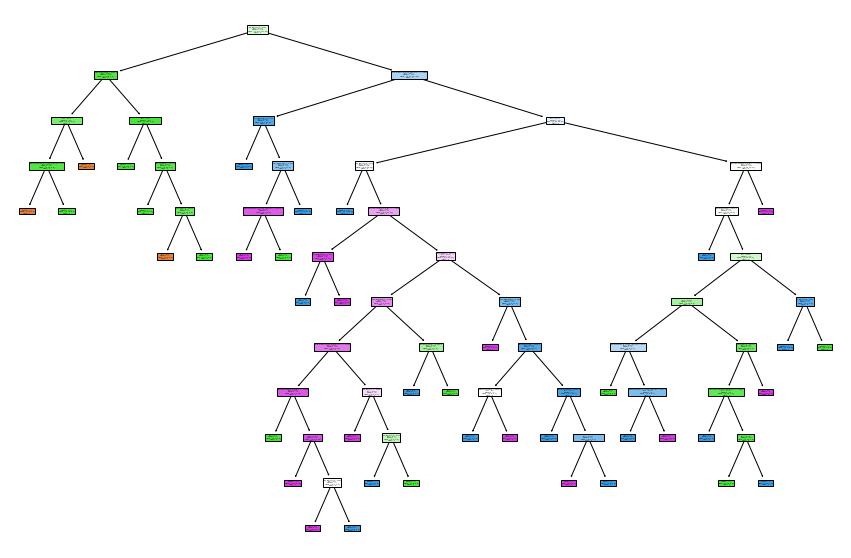

In [78]:
from sklearn.tree import plot_tree

# Extract one of the trees from the random forest
tree = rf_classifier.estimators_[0]  # Change the index to visualize a different tree

# Plot the decision tree
plt.figure(figsize=(15,10))
plot_tree(tree, feature_names=X.columns.tolist(), class_names=['1', '2', '3', '4'], filled=True)
plt.show()


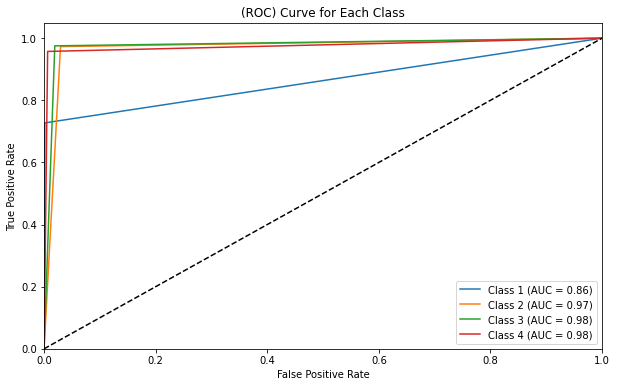

In [79]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(set(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i + 1, y_pred == i + 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i+1} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

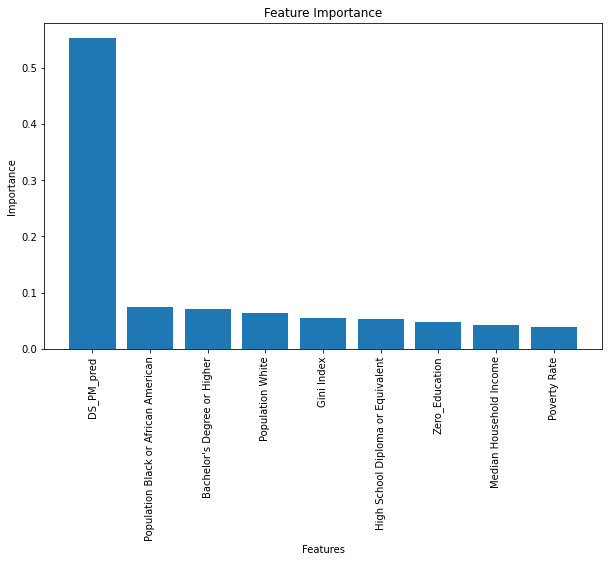

In [80]:
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(feature_importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

The model had an accuracy of 0.9657027572293208. These findings can help areas that have been subject to disinvestment and help inform strategies for equitable urban development.